## Introduction

Significant Contribution of Agri-food Sector to Global Emissions: The dataset emphasizes the substantial role of the agri-food sector in contributing to global CO2 emissions, highlighting the need for sustainable practices within this industry.
Interplay of Emissions, Climate Change, and Geography: The analysis within the notebook delves into the intricate relationship between these factors, providing valuable insights for understanding regional variations and global trends.
Predictive Power of Machine Learning: The notebook demonstrates the practical application of machine learning techniques, specifically in predicting temperature variations. This showcases the potential of data-driven approaches to inform climate change mitigation strategies.


### Potential Areas of Further Exploration:

**Identifying High-Emission Regions and Practices:** Pinpoint specific geographic regions or agricultural practices that contribute disproportionately to CO2 emissions. Analyze the impact of different farming techniques (e.g., conventional vs. organic) on emissions.

**Quantifying the Impact of Climate Change on Agriculture:** Assess how climate change-induced factors like extreme weather events, temperature fluctuations, and altered precipitation patterns affect agricultural productivity and emissions.Model future scenarios to predict the potential impacts of climate change on different agricultural regions.

**Developing Sustainable Agricultural Strategies:** Explore the potential of innovative technologies (e.g., precision agriculture, carbon sequestration techniques) to reduce emissions and enhance agricultural sustainability. Analyze the economic and environmental implications of various sustainable practices to inform policy decisions.

**Policy Recommendations and International Cooperation:** Propose policy measures to incentivize sustainable agriculture and reduce emissions.Advocate for international cooperation to address global challenges related to agriculture and climate change.

### Leveraging Machine Learning for Deeper Insights:

**Time Series Analysis:** Analyze historical emission trends to identify patterns and seasonal variations.Forecast future emissions based on historical data and relevant factors.

**Clustering Analysis:** Group countries or regions with similar emission profiles to identify common characteristics and potential solutions.

**Anomaly Detection:** Identify outliers or unusual emission patterns that may indicate underlying issues or potential risks.

By delving deeper into this dataset and employing advanced data analysis techniques, we can gain valuable insights that will inform evidence-based decision-making and contribute to the development of effective strategies to mitigate climate change.


## Data Collection and Description

***Dataset features***

- **Area:** A country name being analyzed.
 
- **Year:** Year whereby emissions where recorded.

- **Savanna Fires:** Emissions from fires in savanna ecosystems. 

- **Forest Fires:** Emissions from fires in forested areas. Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting. 

- **Crop Residues:** Availability of student's educational resources (Text).

- **Rice Cultivation:** Emissions from methane released during rice cultivation.
- **Drained organic soils (CO2):** Emissions from carbon dioxide released when draining organic soils.
- **Pesticides Manufacturing:** Emissions from the production of pesticides.
- **Food Transport:** Emissions from transporting food products..
- **Forestland:** Land covered by forests.
- **Net Forest conversion:** Change in forest area due to deforestation and afforestation.
- **Food Household Consumption:** Emissions from food consumption at the household level.
- **Food Retail:** Number of sessions used to enhance academic performance per month (Int).
- **Manure Management:** Emissions from managing and treating animal manure
- **Fires in humid tropical forests:** Measure of teacher's effectiveness and competencies (Text).
- **On-farm Electricity Use:** Electricity consumption on farms.
- **Food Packaging:** Emissions from the production and disposal of food packaging materials.
- **Agrifood Systems Waste Disposal:** Emissions from waste disposal in the agrifood system
- **Food Processing:** Emissions from processing food products.
- **Fertilizers Manufacturing:** Emissions from the production of fertilizers.
- **IPPU:** Emissions from industrial processes and product use.
- **Manure applied to Soils:** Emissions from applying animal manure to agricultural soils.
- **Manure left on Pasture:** Emissions from animal manure on pasture or grazing land.
- **Fires in organic soils:** Emissions from fires in organic soils.
- **Fires in humid tropical forests:** Emissions from fires in humid tropical forests.
- **On-farm energy use:** Energy consumption on farms
- **Rural population:** Number of people living in rural areas.
- **Urban population:** Number of people living in urban areas.
- **Total Population - Male:** Total number of male individuals in the population.
- **Total Population - Female:** Total number of female individuals in the population.
- **total_emission:** Total greenhouse gas emissions from various sources.
- **Average Temperature °C:** The average increasing of temperature (by year) in degrees Celsius,

## Data Loading


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import json
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

#Data loading
df = pd.read_csv('co2_emissions_from_agri.csv')

#Display and explore data
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

## Data Cleaning

In [2]:
## set dataset to display all rows.
pd.set_option('display.max_columns', None)
df

pd.set_option('display.max_columns', None)
df

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  Net Forest conversion  \
0            63.1152  -2388.8030                 0.0000   
1            61.2125  -2388.8030                 0.0000   
2            53.3170  -2388.8030                 0.0000   
3            54.3617  -2388.8030                 0.0000   
4            53.9874  -2388.8030                 0.0000   
...              ...         ...                    ...   
6960        251.1465  76500.2982             10662.4408   
6961        255.7975  76500.2982             10662.4408   
6962        327.0897  76500.2982             10662.4408   
6963        290.1893  76500.2982             10662.4408   
6964        238.7639  76500.2982             10662.4408   

      Food Household Consumption  Food Retail  On-farm Electricity Use  \
0                        79.0851     109.6446                  14.2666   
1                        80.4885     116.6789                  11.4182   
2                        80.7692     126.1721                   9.2752   
3                        85.0678      81.4607                   9.0635   
4                        88.8058      90.4008                   8.3962   
...                          ...          ...                      ...   
6960                    251.2681     443.0872                 428.4352   
6961                    203.1236     445.3881                 304.7852   
6962                    211.1539     492.8599                 346.8512   
6963                    228.6381     542.5922                 350.2168   
6964                    213.9211     568.0445                 350.2168   

      Food Packaging  Agrifood Systems Waste Disposal  Food Processing  \
0          67.631366                         691.7888        252.21419   
1          67.631366                         710.8212        252.21419   
2          67.631366                         743.6751        252.21419   
3          67.631366                         791.9246        252.21419   
4          67.631366                         831.9181        252.21419   
...              ...                              ...              ...   
6960       22.910800                        1077.2392        317.07440 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [4]:
df.describe()

Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     0.000000   
75%         1536.640000                   690.408800   
max       164915.255600                241025.069600   

       Pesticides Manufacturing  Food Transport     Forestland  \
count               6965.000000     6965.000000    6472.000000   
mean                 333.418393     1939.581760  -17828.285678   
std                 1429.159367     5616.748808   81832.210543   
min                    0.000000        0.000100 -797183.079000   
25%                    6.000000       27.958600   -2848.350000   
50%                   13.000000      204.962800     -62.920000   
75%                  116.325487     1207.000900       0.000000   
max                16459.000000    67945.765000  171121.076000   

       Net Forest conversion  Food Household Consumption    Food Retail  \
count           6.472000e+03                 6492.000000    6965.000000   
mean            1.760564e+04                 4847.580384    2043.210539   
std             1.011575e+05                25789.143619    8494.249260   
min             0.000000e+00                    0.000000       0.000000   
25%             0.000000e+00                   11.399950      26.818500   
50%             4.444000e+01                  155.471100     172.042600   
75%             4.701746e+03                 1377.151950    1075.999100   
max             1.605106e+06               466288.200700  133784.065300   

       On-farm Electricity Use  Food Packaging  \
count              6965.000000     6965.000000   
mean               1626.681460     1658.629808   
std                9343.182193    11481.343725   
min                   0.000000        0.000000   
25%                   8.037600       67.631366   
50%                  29.120700       74.018133   
75%                 499.944700      281.791000   
max              165676.299000   175741.306100   

       Agrifood Systems Waste Disposal  Food Processing  \
count                      6965.000000      6965.000000   
mean                       6018.444633      3872.724461   
std                       22156.742542     19838.216846   
min                           0.340000         0.000100   
25%                          86.680500       209.587728   
50%                         901.275700       344.760200   
75%                        3006.442100      1236.913400   
max                      213289.701600    274253.512500   

       Fertilizers Manufacturing          IPPU  Manure applied to Soils  \
count                6965.000000  6.222000e+03              6037.000000   
mean                 3035.723356  1.999150e+04               923.225603   
std                 11693.029064  1.114209e+05              3226.992039   
min                     0.001900  0.000000e+00                 0.049000   
25%                   360.358799  3.903153e+01                16.303000   
50%                  1115.052400  8.037066e+02               120.443900   
75%                  2024.869900  6.155175e+03               460.120200   
max                170826.423300  1.861641e+06             3

In [5]:
df.shape

(6965, 31)

In [6]:
df.isnull()

Area   Year  Savanna fires  Forest fires  Crop Residues  \
0     False  False          False         False          False   
1     False  False          False         False          False   
2     False  False          False         False          False   
3     False  False          False         False          False   
4     False  False          False         False          False   
...     ...    ...            ...           ...            ...   
6960  False  False          False         False          False   
6961  False  False          False         False          False   
6962  False  False          False         False          False   
6963  False  False          False         False          False   
6964  False  False          False         False          False   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0                False                        False                     False   
1                False                        False                     False   
2                False                        False                     False   
3                False                        False                     False   
4                False                        False                     False   
...                ...                          ...                       ...   
6960             False                        False                     False   
6961             False                        False                     False   
6962             False                        False                     False   
6963             False                        False                     False   
6964             False                        False                     False   

      Food Transport  Forestland  Net Forest conversion  \
0              False       False                  False   
1              False       False                  False   
2              False       False                  False   
3              False       False                  False   
4              False       False                  False   
...              ...         ...                    ...   
6960           False       False                  False   
6961           False       False                  False   
6962           False       False                  False   
6963           False       False                  False   
6964           False       False                  False   

      Food Household Consumption  Food Retail  On-farm Electricity Use  \
0                          False        False                    False   
1                          False        False                    False   
2                          False        False                    False   
3                          False        False                    False   
4                          False        False                    False   
...                          ...          ...                      ...   
6960                       False        False                    False   
6961                       False        False                    False   
6962                       False        False                    False   
6963                       False        False                    False   
6964                       False        False                    False   

      Food Packaging  Agrifood Systems Waste Disposal  Food Processing  \
0              False                            False            False   
1              False                            False            False   
2              False                            False            False   
3              False                            False            False   
4              False                            False            False   
...              ...                              ...              ...   
6960           False                            False            False   
6961           False                            Fal

In [7]:
df.dropna()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
31     Albania  1990         5.5561        7.0253        59.2391   
32     Albania  1991         5.5561        7.0253        31.4625   
33     Albania  1992         5.5561        7.0253        29.9373   
34     Albania  1993         5.5561        7.0253        44.0550   
35     Albania  1994         5.5561        7.0253        42.4253   
...        ...   ...            ...           ...            ...   
6960  Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961  Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962  Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963  Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964  Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
31             23.5200                     110.5705                       2.0   
32              6.2720                     110.5705                       2.0   
33              1.8816                     110.5705                       2.0   
34              1.0976                     110.5705                       2.0   
35              0.0000                     110.5705                       3.0   
...                ...                          ...                       ...   
6960            7.4088                       0.0000                      75.0   
6961            7.9458                       0.0000                      67.0   
6962            8.1399                       0.0000                      66.0   
6963            7.8322                       0.0000                      73.0   
6964            7.9733                       0.0000                      73.0   

      Food Transport  Forestland  Net Forest conversion  \
31           46.9645     72.8581                 0.0000   
32           47.9519     72.8581                 0.0000   
33           40.5272     72.8581                 0.0000   
34           57.6592     72.8581                 0.0000   
35           72.4242     72.8581                 0.0000   
...              ...         ...                    ...   
6960        251.1465  76500.2982             10662.4408   
6961        255.7975  76500.2982             10662.4408   
6962        327.0897  76500.2982             10662.4408   
6963        290.1893  76500.2982             10662.4408   
6964        238.7639  76500.2982             10662.4408   

      Food Household Consumption  Food Retail  On-farm Electricity Use  \
31                       16.0124       8.3013                  45.2103   
32                       11.4657       2.7448                  18.4951   
33                        7.9077       3.4281                   4.2558   
34                       16.5217       7.0102                   8.6999   
35                       17.5634       5.7802                   3.0976   
...                          ...          ...                      ...   
6960                    251.2681     443.0872                 428.4352   
6961                    203.1236     445.3881                 304.7852   
6962                    211.1539     492.8599                 346.8512   
6963                    228.6381     542.5922                 350.2168   
6964                    213.9211     568.0445                 350.2168   

      Food Packaging  Agrifood Systems Waste Disposal  Food Processing  \
31            2.8500                         444.4512       131.569124   
32            3.2048                         443.8552       131.569124   
33            3.6700                         445.0997       131.569124   
34            4.4197                         446.7996       131.569124   
35            5.1834                         449.4347       131.569124   
...              ...                              ...              ...   
6960         22.9108                        1077.2392       317.074400   
6961         18.9857          

In [8]:
df.drop_duplicates()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0     Afghanistan  1990        14.7237        0.0557       205.6077   
1     Afghanistan  1991        14.7237        0.0557       209.4971   
2     Afghanistan  1992        14.7237        0.0557       196.5341   
3     Afghanistan  1993        14.7237        0.0557       230.8175   
4     Afghanistan  1994        14.7237        0.0557       242.0494   
...           ...   ...            ...           ...            ...   
6960     Zimbabwe  2016      1190.0089      232.5068        70.9451   
6961     Zimbabwe  2017      1431.1407      131.1324       108.6262   
6962     Zimbabwe  2018      1557.5830      221.6222       109.9835   
6963     Zimbabwe  2019      1591.6049      171.0262        45.4574   
6964     Zimbabwe  2020       481.9027       48.4197       108.3022   

      Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0             686.0000                          0.0                 11.807483   
1             678.1600                          0.0                 11.712073   
2             686.0000                          0.0                 11.712073   
3             686.0000                          0.0                 11.712073   
4             705.6000                          0.0                 11.712073   
...                ...                          ...                       ...   
6960            7.4088                          0.0                 75.000000   
6961            7.9458                          0.0                 67.000000   
6962            8.1399                          0.0                 66.000000   
6963            7.8322                          0.0                 73.000000   
6964            7.9733                          0.0                 73.000000   

      Food Transport  Forestland  Net Forest conversion  \
0            63.1152  -2388.8030                 0.0000   
1            61.2125  -2388.8030                 0.0000   
2            53.3170  -2388.8030                 0.0000   
3            54.3617  -2388.8030                 0.0000   
4            53.9874  -2388.8030                 0.0000   
...              ...         ...                    ...   
6960        251.1465  76500.2982             10662.4408   
6961        255.7975  76500.2982             10662.4408   
6962        327.0897  76500.2982             10662.4408   
6963        290.1893  76500.2982             10662.4408   
6964        238.7639  76500.2982             10662.4408   

      Food Household Consumption  Food Retail  On-farm Electricity Use  \
0                        79.0851     109.6446                  14.2666   
1                        80.4885     116.6789                  11.4182   
2                        80.7692     126.1721                   9.2752   
3                        85.0678      81.4607                   9.0635   
4                        88.8058      90.4008                   8.3962   
...                          ...          ...                      ...   
6960                    251.2681     443.0872                 428.4352   
6961                    203.1236     445.3881                 304.7852   
6962                    211.1539     492.8599                 346.8512   
6963                    228.6381     542.5922                 350.2168   
6964                    213.9211     568.0445                 350.2168   

      Food Packaging  Agrifood Systems Waste Disposal  Food Processing  \
0          67.631366                         691.7888        252.21419   
1          67.631366                         710.8212        252.21419   
2          67.631366                         743.6751        252.21419   
3          67.631366                         791.9246        252.21419   
4          67.631366                         831.9181        252.21419   
...              ...                              ...              ...   
6960       22.910800                        1077.2392        317.07440 

## Exploratory Data Analysis

<Axes: xlabel='Year', ylabel='Rice Cultivation'>

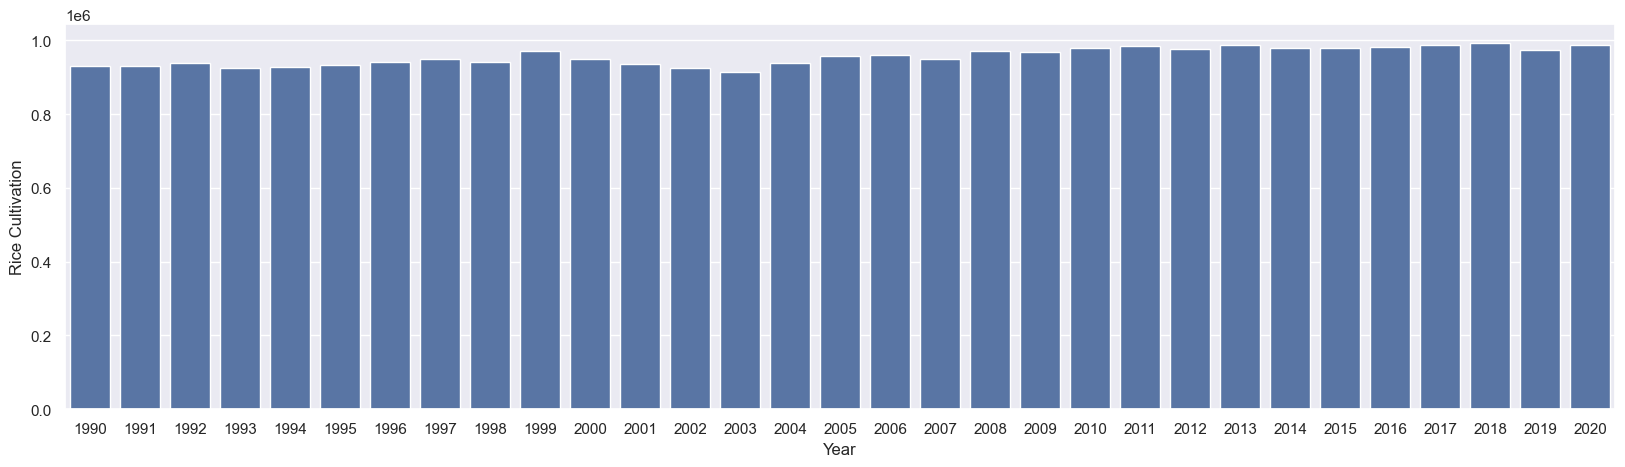

In [9]:
sales_state = df.groupby(['Year'], as_index=False)['Rice Cultivation'].sum().sort_values(by='Rice Cultivation', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Year', y= 'Rice Cultivation')

<Axes: xlabel='Year', ylabel='Manure applied to Soils'>

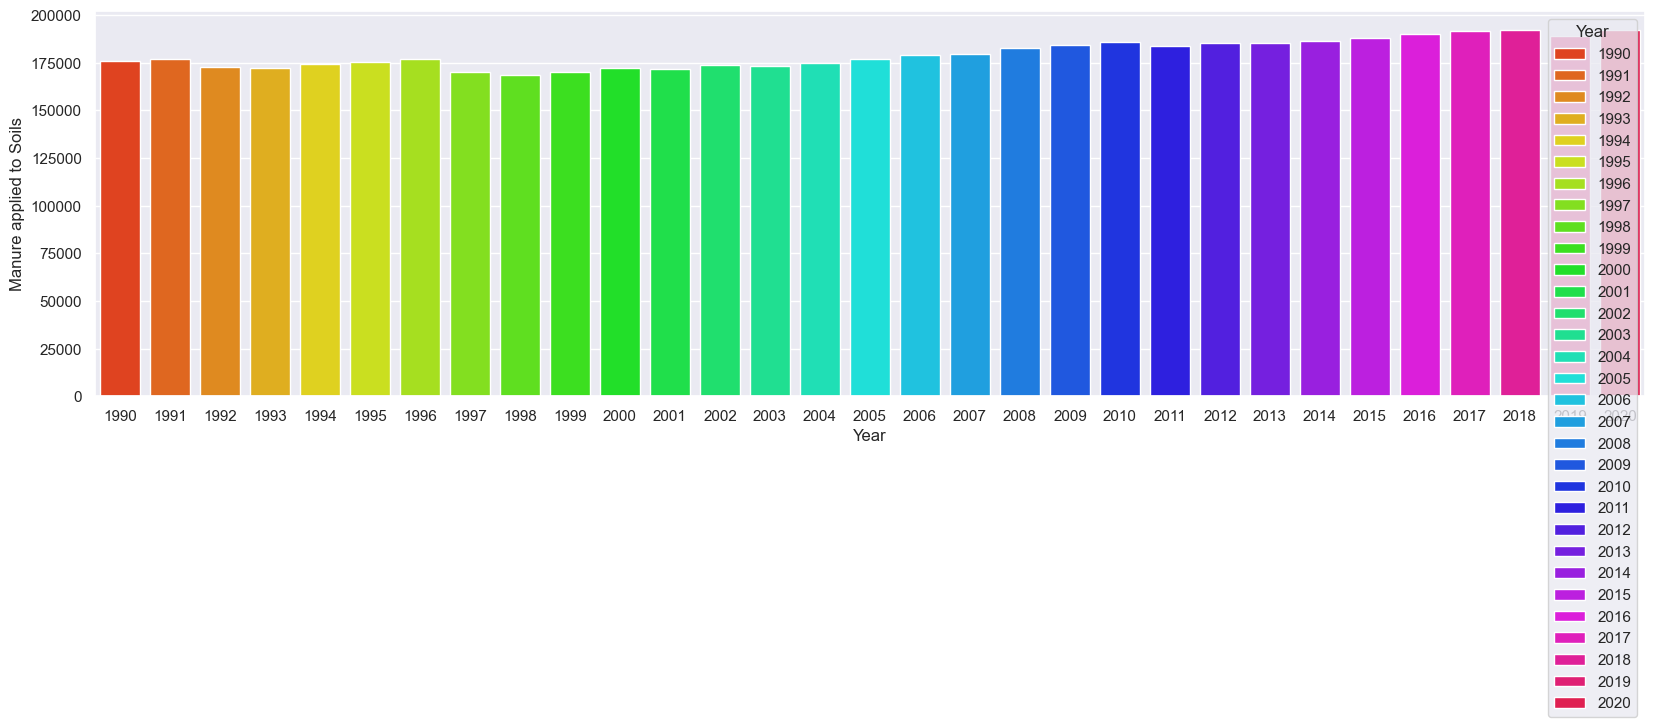

In [10]:

sales_state = df.groupby(['Year'], as_index=False)['Manure applied to Soils'].sum().sort_values(by='Manure applied to Soils', ascending=False)
palette = sns.color_palette("hsv", len(sales_state))
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Year', y= 'Manure applied to Soils', hue='Year', palette=palette)

<p style='text-align: justify;'>Also adding an extra column to the dataset for the total population, calculated from the total male and female population for each year.</p>

In [11]:
df['total_population'] = df.loc[:,'Total Population - Male'] + df.loc[:,'Total Population - Female']

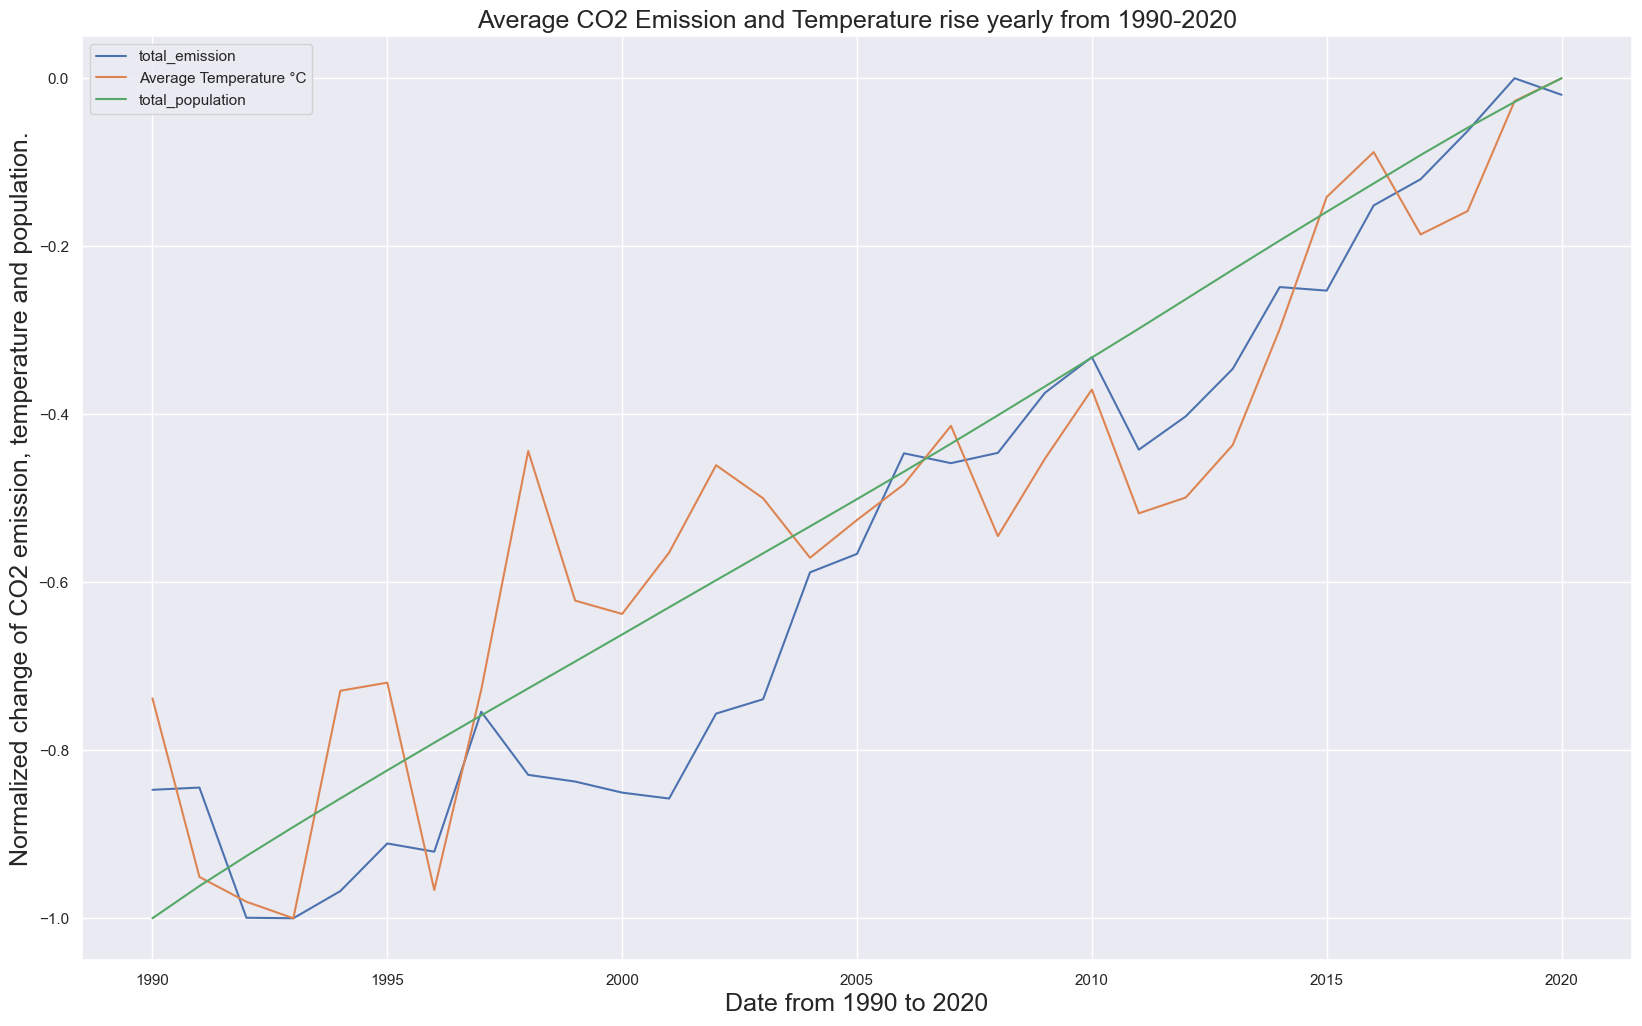

In [12]:
def normalize(df):
    n = (df-df.max())/(df.max()-df.min())
    return n

df_year = df.groupby('Year')[['total_emission','Average Temperature °C']].mean()
df_pop = df.groupby('Year')['total_population'].sum()  #['Total_Population_Male','Total_Population_Female'].sum()
df_year['total_population'] = df_pop
df_year_norm = normalize(df_year)

df_year_norm.plot(figsize=(20, 12))
plt.title('Average CO2 Emission and Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of CO2 emission, temperature and population.', fontsize = 18)
plt.show()

From the graph above it can be seen that there is a direct correlation between the CO2 emission with temperature rise and the population growth. These emissions only about 1/5th of the total CO2 emission wordwide but the direct proportionality and upward trend can be seen from this dataset as well.

<Axes: xlabel='Year', ylabel='Average Temperature °C'>

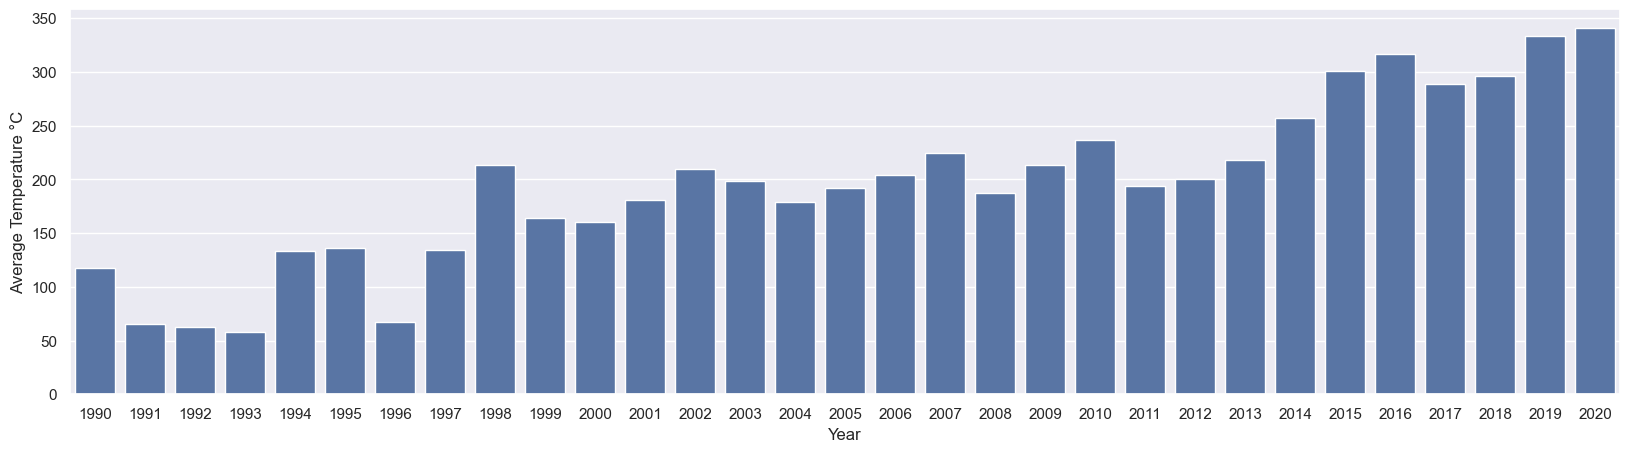

In [13]:
sales_state = df.groupby(['Year'], as_index=False)['Average Temperature °C'].sum().sort_values(by='Average Temperature °C', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Year', y= 'Average Temperature °C')

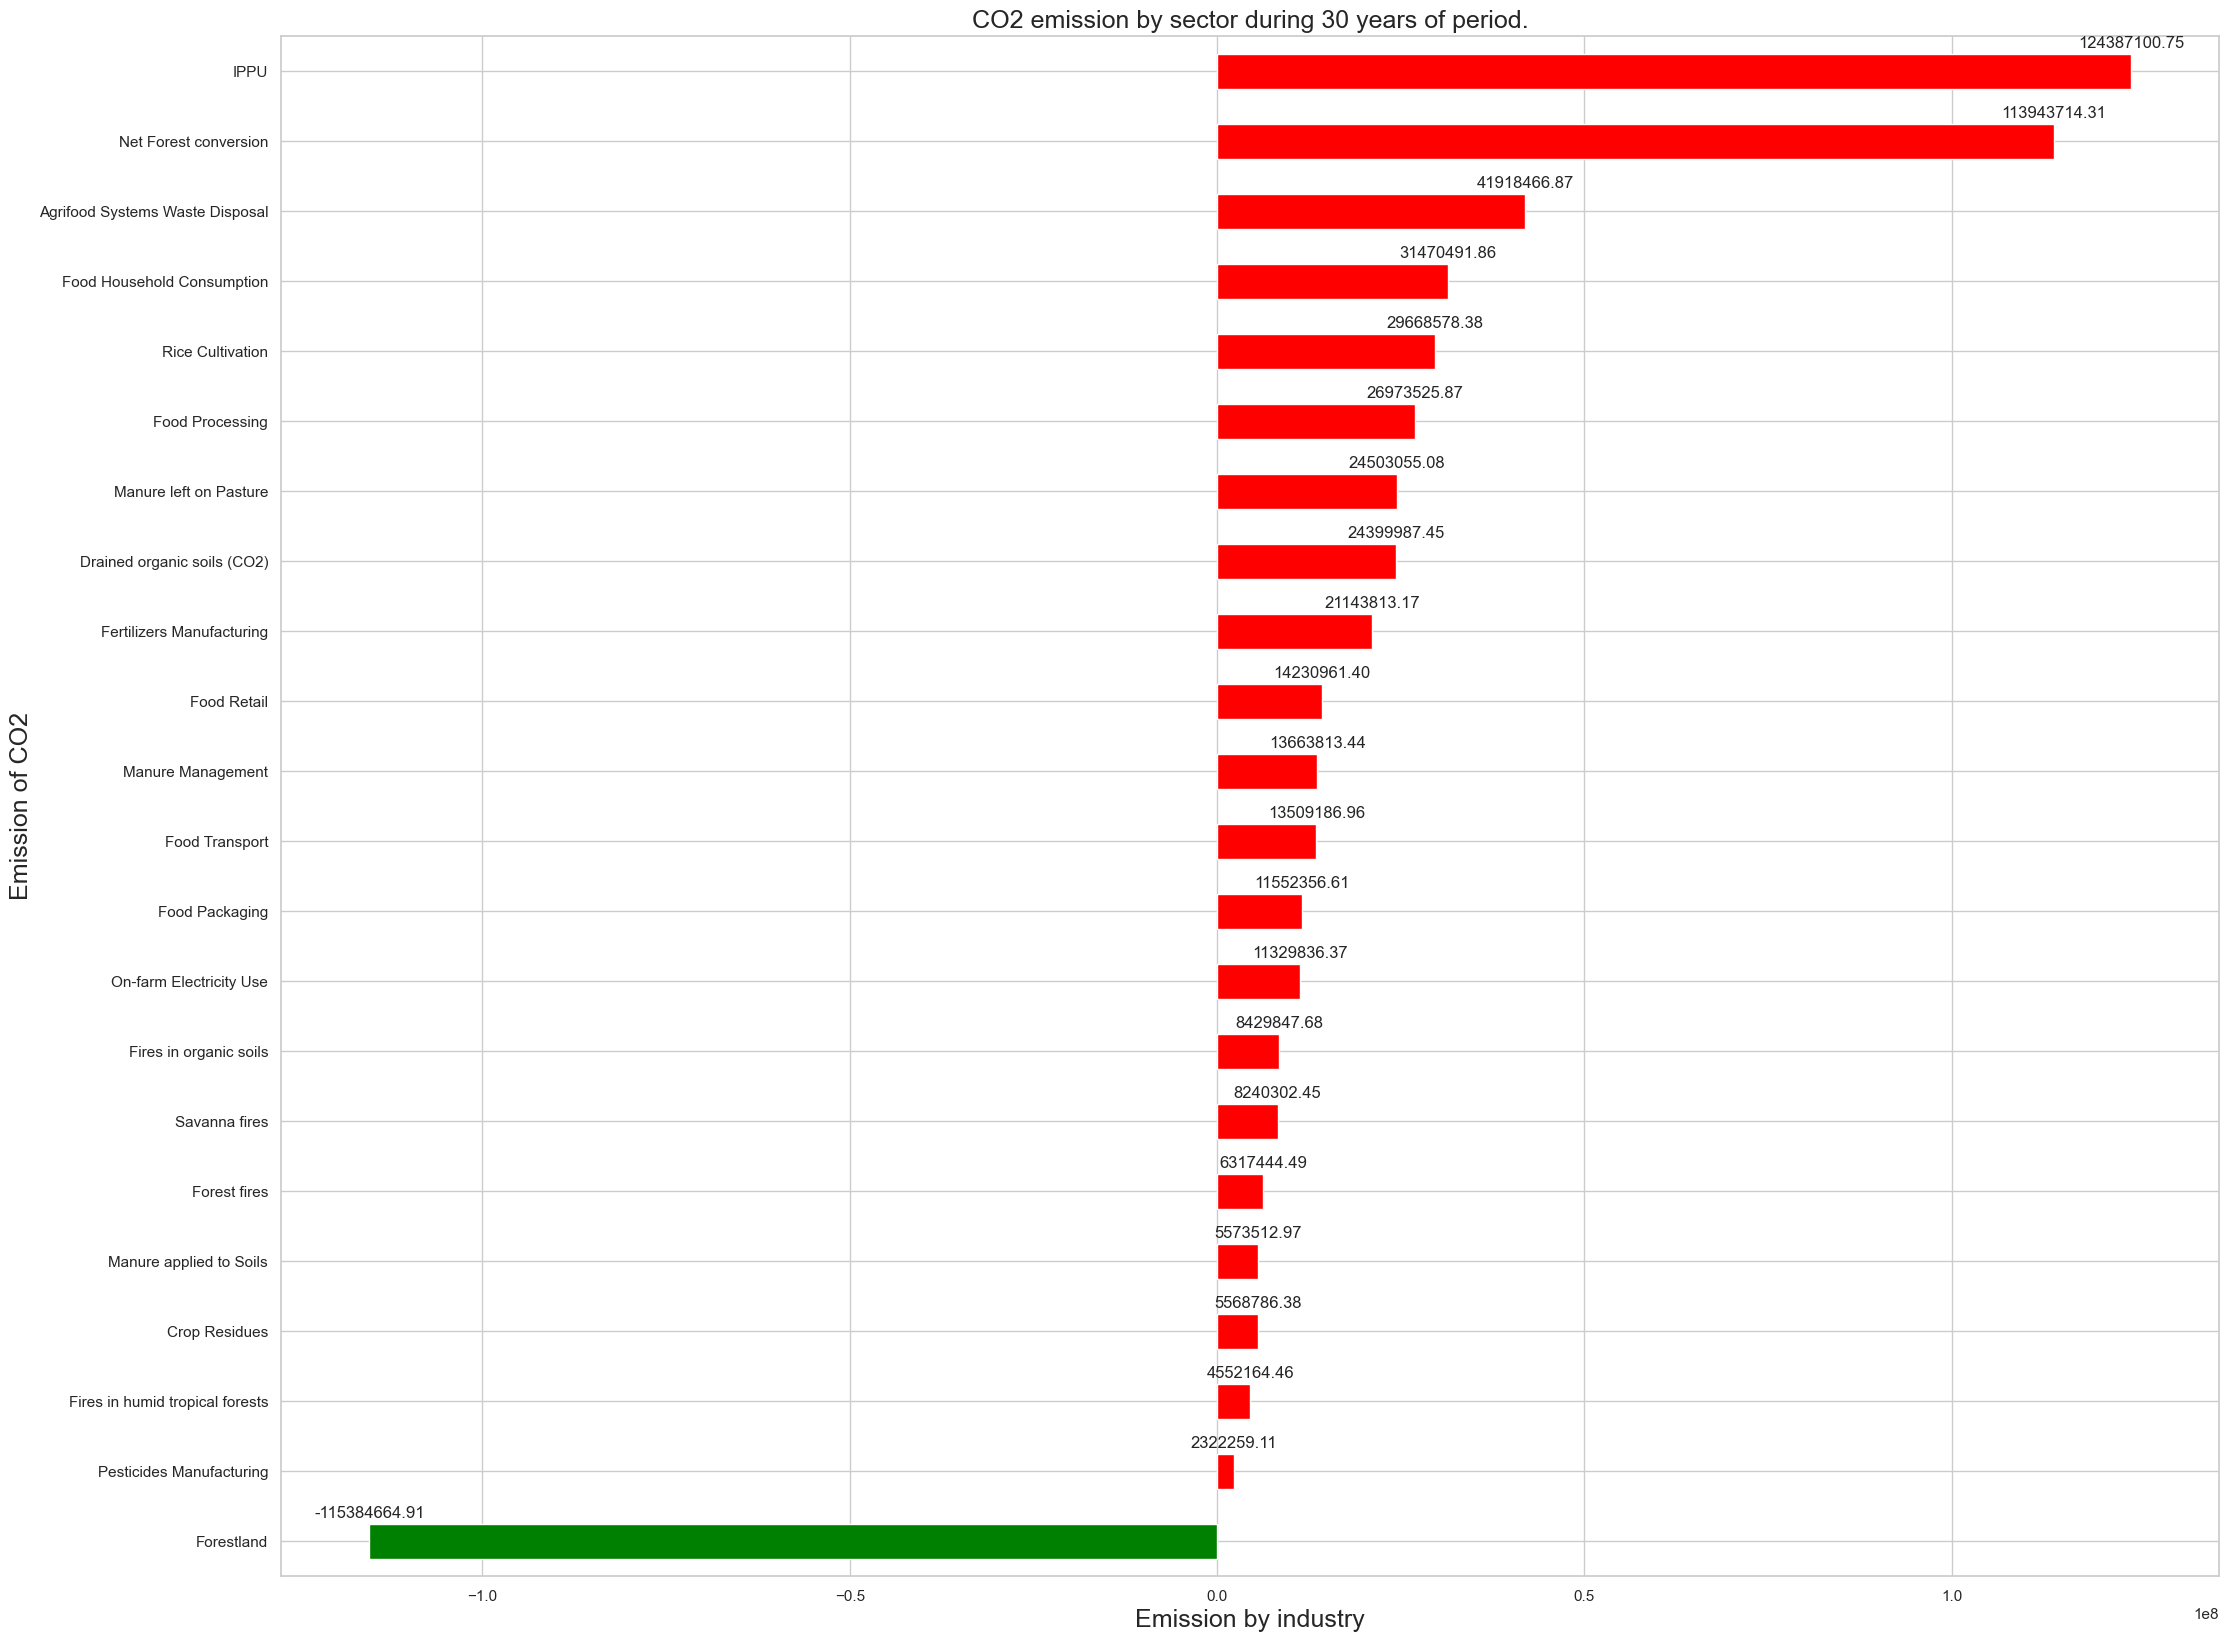

In [14]:
df_emitter = df.iloc[:,1:24].groupby('Year').sum()
sns.set_style('whitegrid')
df_emitter_tot = df_emitter.sum(axis = 0).sort_values()

colors = ['green' if (x < 0) else 'red' for x in df_emitter_tot]
g = df_emitter_tot.plot(kind = 'barh', 
                        figsize = (25, 20), 
                        color = colors, 
                        rot = 0) 
plt.title('CO2 emission by sector during 30 years of period.', fontsize = 18)
plt.xlabel('Emission by industry', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)

for p in g.patches:
    width = p.get_width()
    plt.text(p.get_width(), p.get_y()+ 1.3* p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
plt.show()

In [15]:
plt.figure(figsize = (10, 6))
df3 = df.groupby('Area')['Food Household Consumption'].sum().sort_values(ascending=False)
df3

Area
China                           6.972704e+06
China, mainland                 6.466468e+06
United States of America        3.451366e+06
Russian Federation              1.122092e+06
India                           1.112622e+06
                                    ...     
Saint Pierre and Miquelon       0.000000e+00
Tokelau                         0.000000e+00
United States Virgin Islands    0.000000e+00
Western Sahara                  0.000000e+00
Wallis and Futuna Islands       0.000000e+00
Name: Food Household Consumption, Length: 236, dtype: float64

<Figure size 1000x600 with 0 Axes>

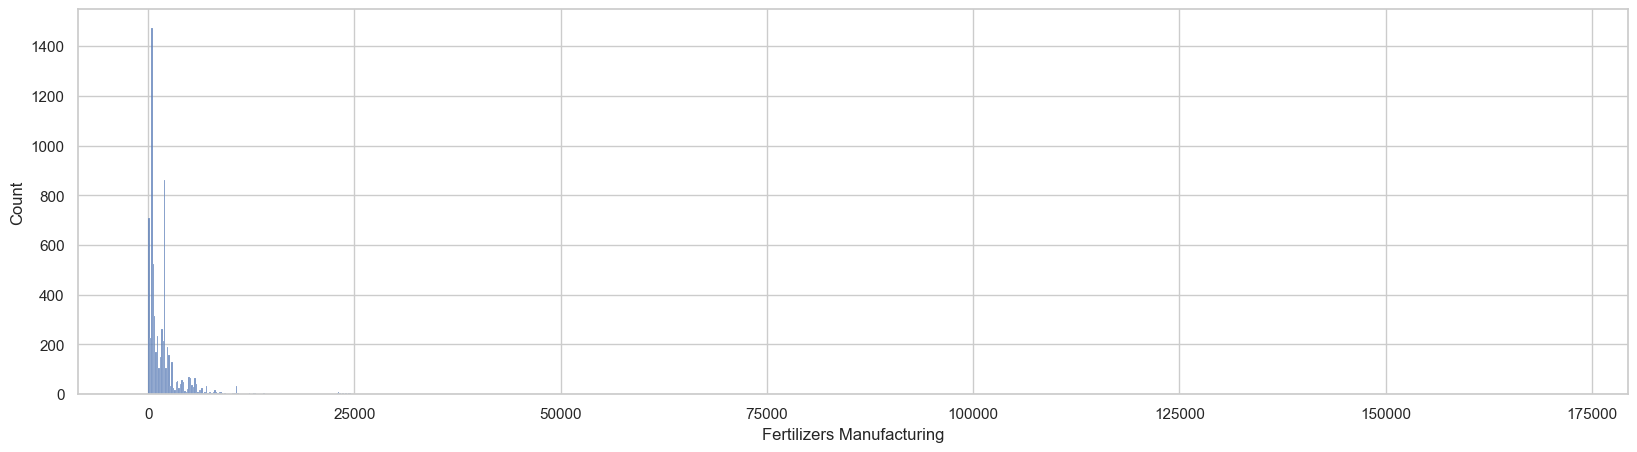

In [16]:
sns.histplot(df['Fertilizers Manufacturing']);

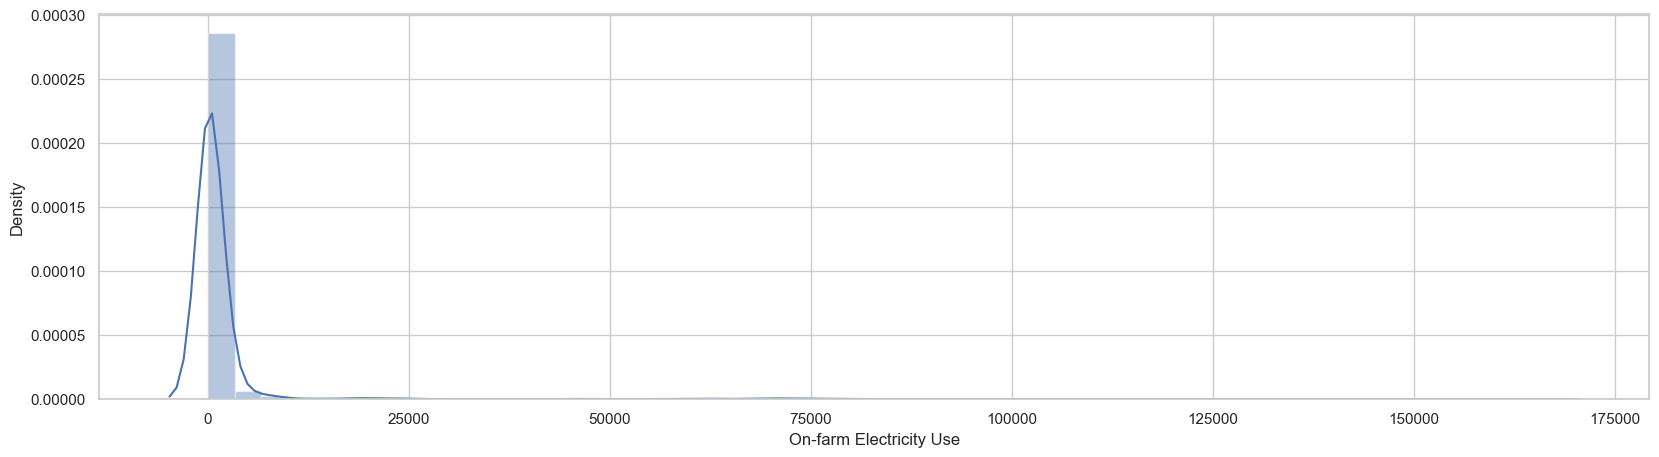

In [17]:
sns.distplot(df['On-farm Electricity Use'])
plt.show()

<Axes: ylabel='On-farm Electricity Use'>

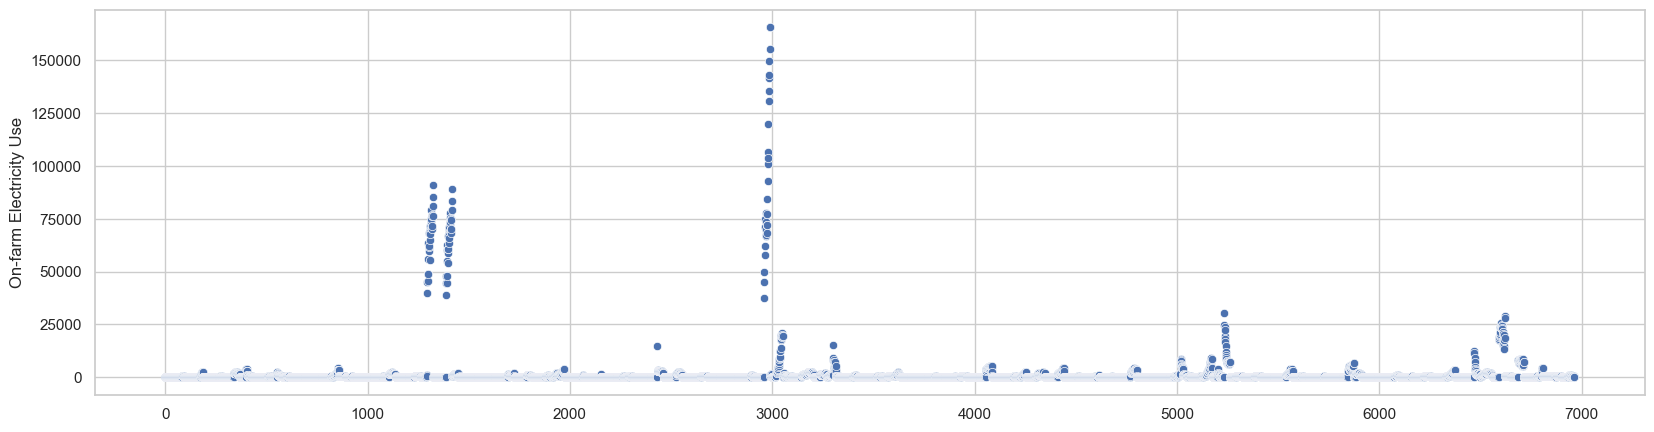

In [18]:
sns.scatterplot(df['On-farm Electricity Use'])

In [19]:
df_totalemi = df.groupby('Area')['total_emission'].sum()
df_totalemi = pd.DataFrame(df_totalemi).sort_values('total_emission', ascending = False)

df_top10 = df_totalemi.head(10).reset_index()
df_top10['Proportion_(%)'] = (df_top10['total_emission'] / df_top10['total_emission'].sum() )* 100
df_top10

Area  total_emission  Proportion_(%)
0                             China    5.874984e+07       22.327829
1                   China, mainland    5.662423e+07       21.519990
2                            Brazil    3.659621e+07       13.908357
3                         Indonesia    2.821637e+07       10.723607
4          United States of America    2.319088e+07        8.813676
5                             India    1.972033e+07        7.494694
6  Democratic Republic of the Congo    1.660635e+07        6.311229
7                            Canada    9.798652e+06        3.723969
8                             Japan    6.923093e+06        2.631115
9                            Mexico    6.697904e+06        2.545533

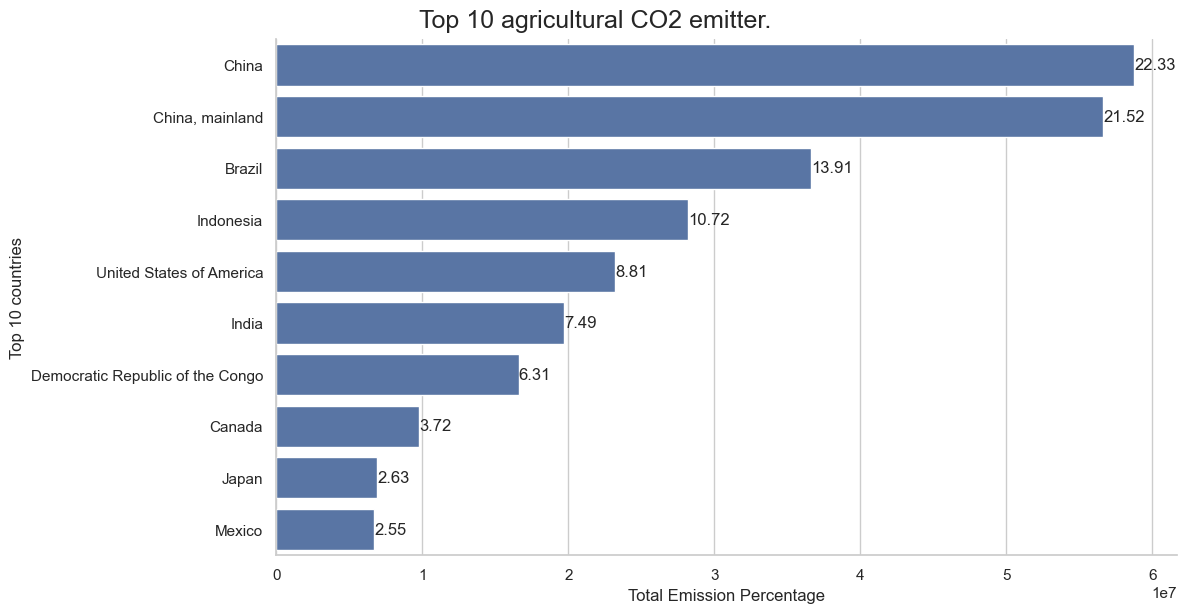

In [20]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_top10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Top 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission Percentage',
      ylabel = 'Top 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_top10['Proportion_(%)'], 2), label_type='edge')
plt.show()

In [21]:
df_bottom10 = df_totalemi.tail(10).reset_index()
df_bottom10['Proportion_(%)'] = (df_bottom10['total_emission'] / df_bottom10['total_emission'].sum() )* 100
df_bottom10

Area  total_emission  Proportion_(%)
0                 Bhutan   -2.412280e+01        0.000401
1                Georgia   -4.730578e+04        0.786263
2                 Latvia   -5.110531e+04        0.849415
3  Serbia and Montenegro   -5.933866e+04        0.986260
4               Slovenia   -6.546388e+04        1.088067
5                Finland   -9.975058e+04        1.657941
6               Bulgaria   -3.108318e+05        5.166293
7                Romania   -4.778241e+05        7.941851
8                  Chile   -5.811333e+05        9.658940
9     Russian Federation   -4.323756e+06       71.864570

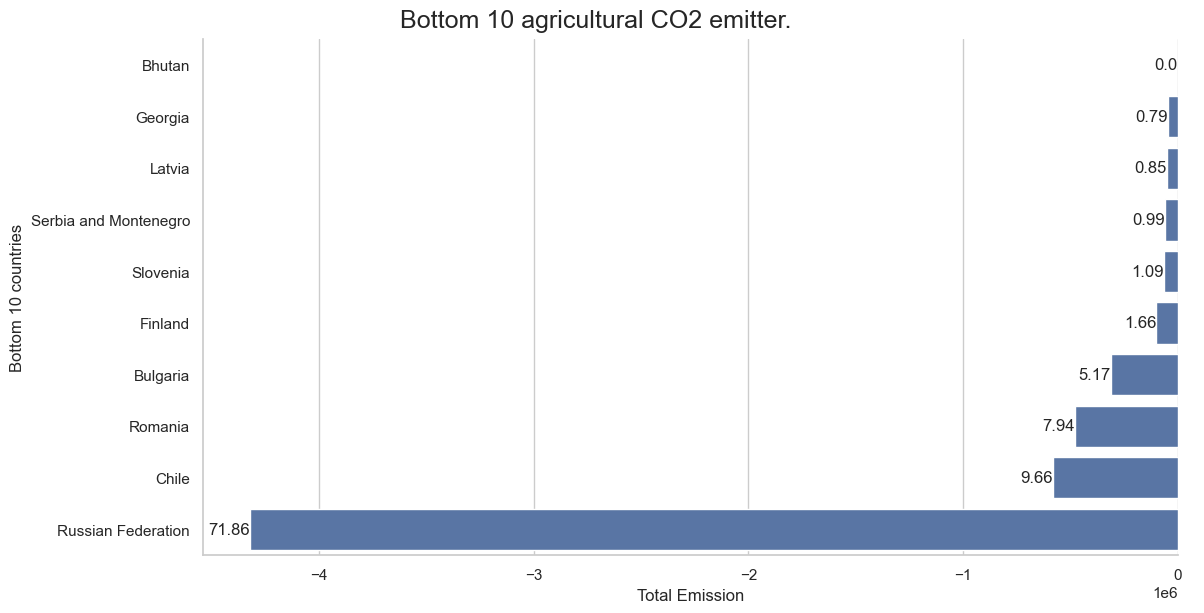

In [22]:
g = sns.catplot(x = 'total_emission',
            y = 'Area',
            data = df_bottom10,
            kind = 'bar',
            ci = None,
            height = 6,
            aspect = 2)
g.fig.suptitle('Bottom 10 agricultural CO2 emitter.', y = 1.02, fontsize = 18)
g.set(xlabel = 'Total Emission',
      ylabel = 'Bottom 10 countries')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=round(df_bottom10['Proportion_(%)'], 2), label_type='edge')
plt.show()

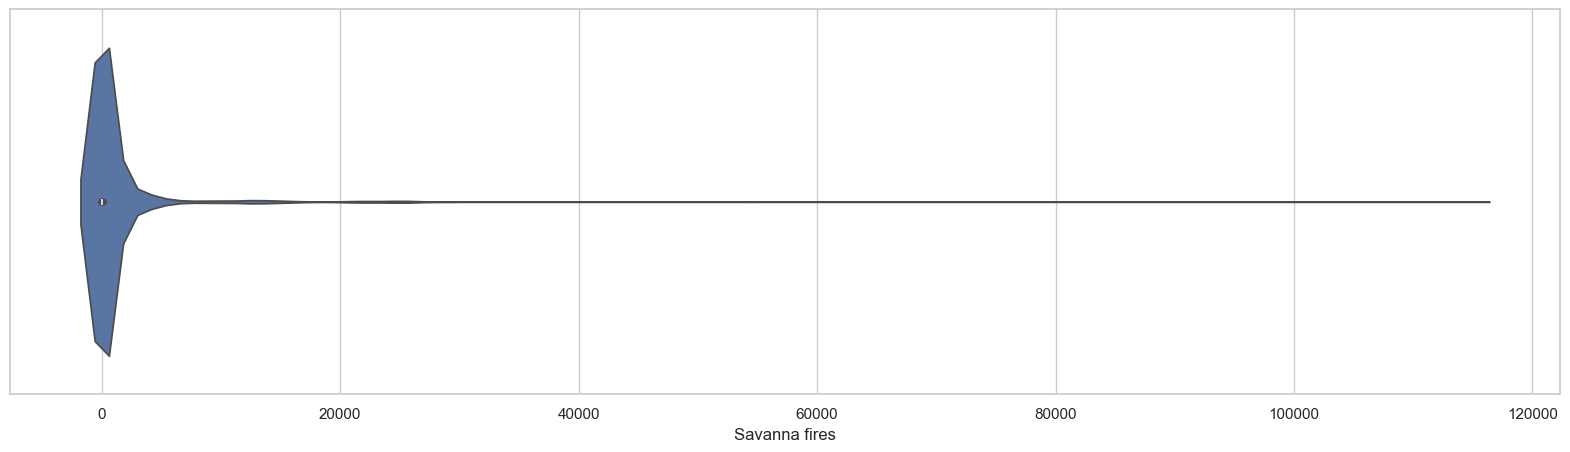

In [23]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["Savanna fires"])

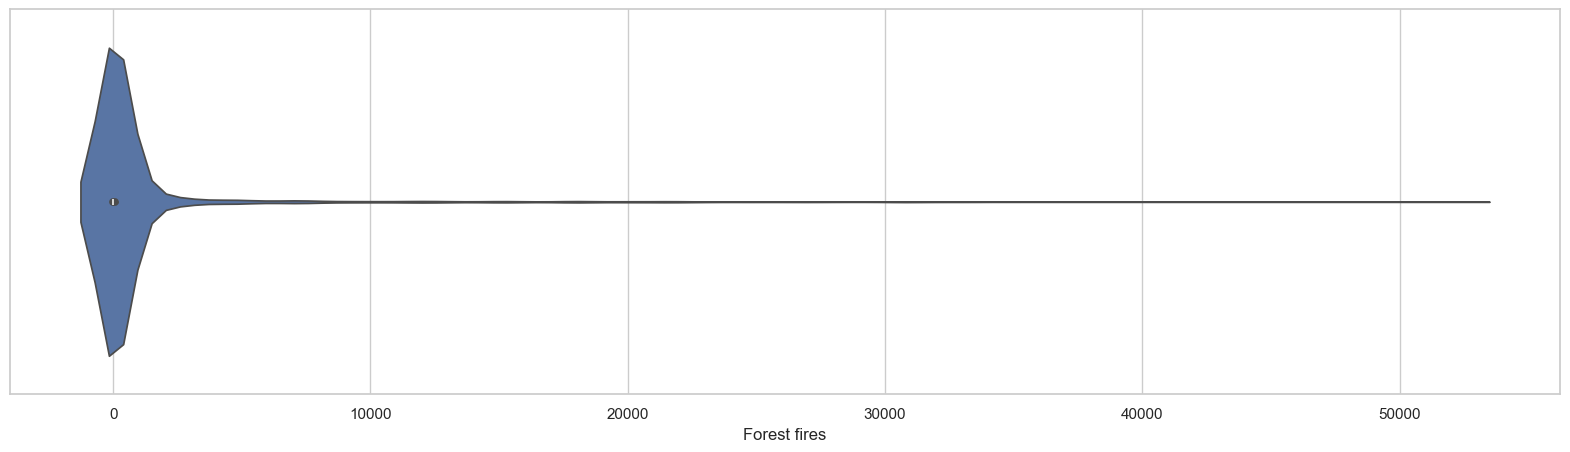

In [24]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["Forest fires"])

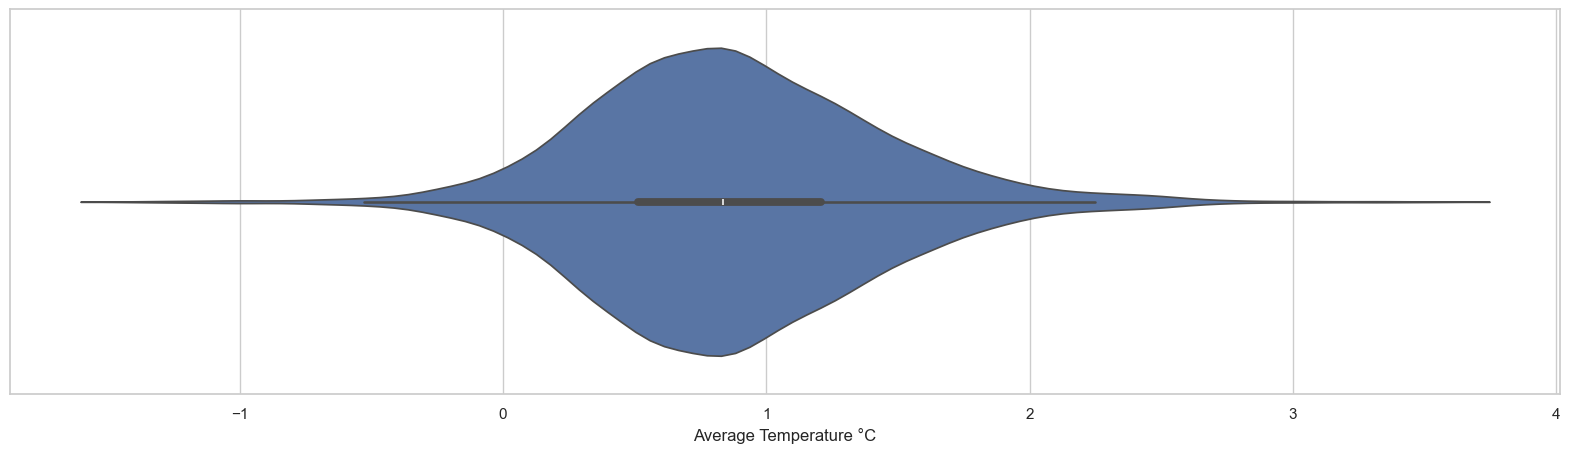

In [25]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df["Average Temperature °C"])

The below functionality allocates the different Areas to the respective continents, in order to do so we got an online continents json file which contains country and continents map and we then take the Area from our dataset and map it.

In [26]:
# Loading continents from the json file
continents = json.load(open('continents.json','r'))

#This function assign a continent label to each country in the co2_emission 
def assign_continent(area):
    for continent, country in continents.items():
        if area in country:
            return continent

df['Continents'] = df.loc[:,'Area'].apply(assign_continent)

Looking at the average temperature change due to carnon emission year by year in the different regions of the world. From the next three plot we can conclude that the most effected by the CO2 emission is Europe and the second one is Asia.

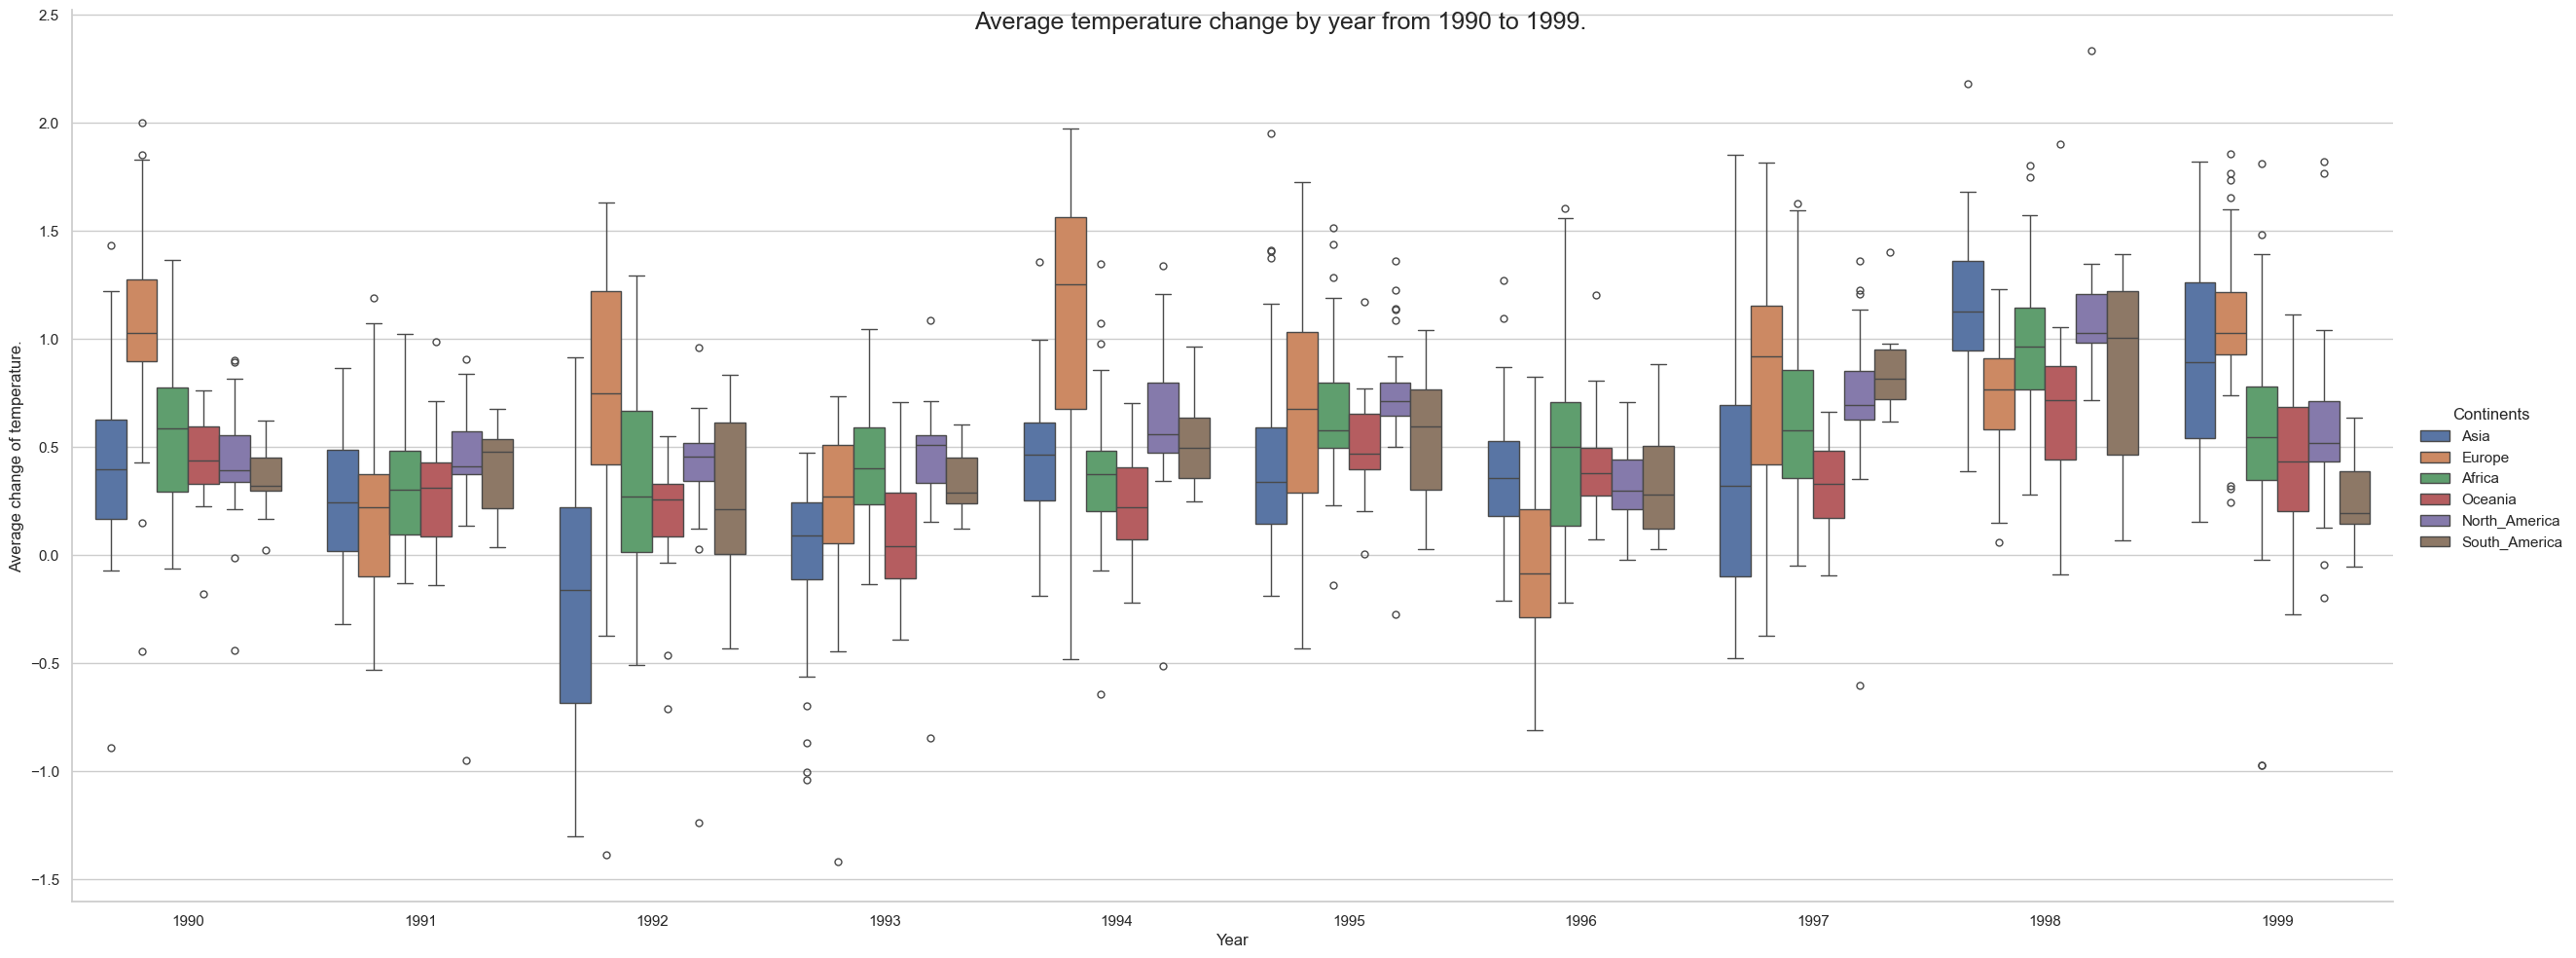

In [27]:
df_1990_1999 = df.query('Year >= 1990 and Year <= 1999')
df_2000_2009 = df.query('Year >= 2000 and Year <= 2009')
df_2010_2020 = df.query('Year >= 2010 and Year <= 2020')

def plotEmissionBoxPlot(dataframe, title):
      sns.set_style('whitegrid')
      g = sns.catplot(x = 'Year',
                  y = 'Average Temperature °C',
                  data = dataframe,
                  kind = 'box',
                  hue = 'Continents',
                  height=10, 
                  aspect=2.5
                  )
      g.fig.suptitle('Average temperature change by year from ' + title, fontsize = 18)
      g.set(xlabel = 'Year', ylabel = 'Average change of temperature.')
      plt.show()

plotEmissionBoxPlot(df_1990_1999, '1990 to 1999.')

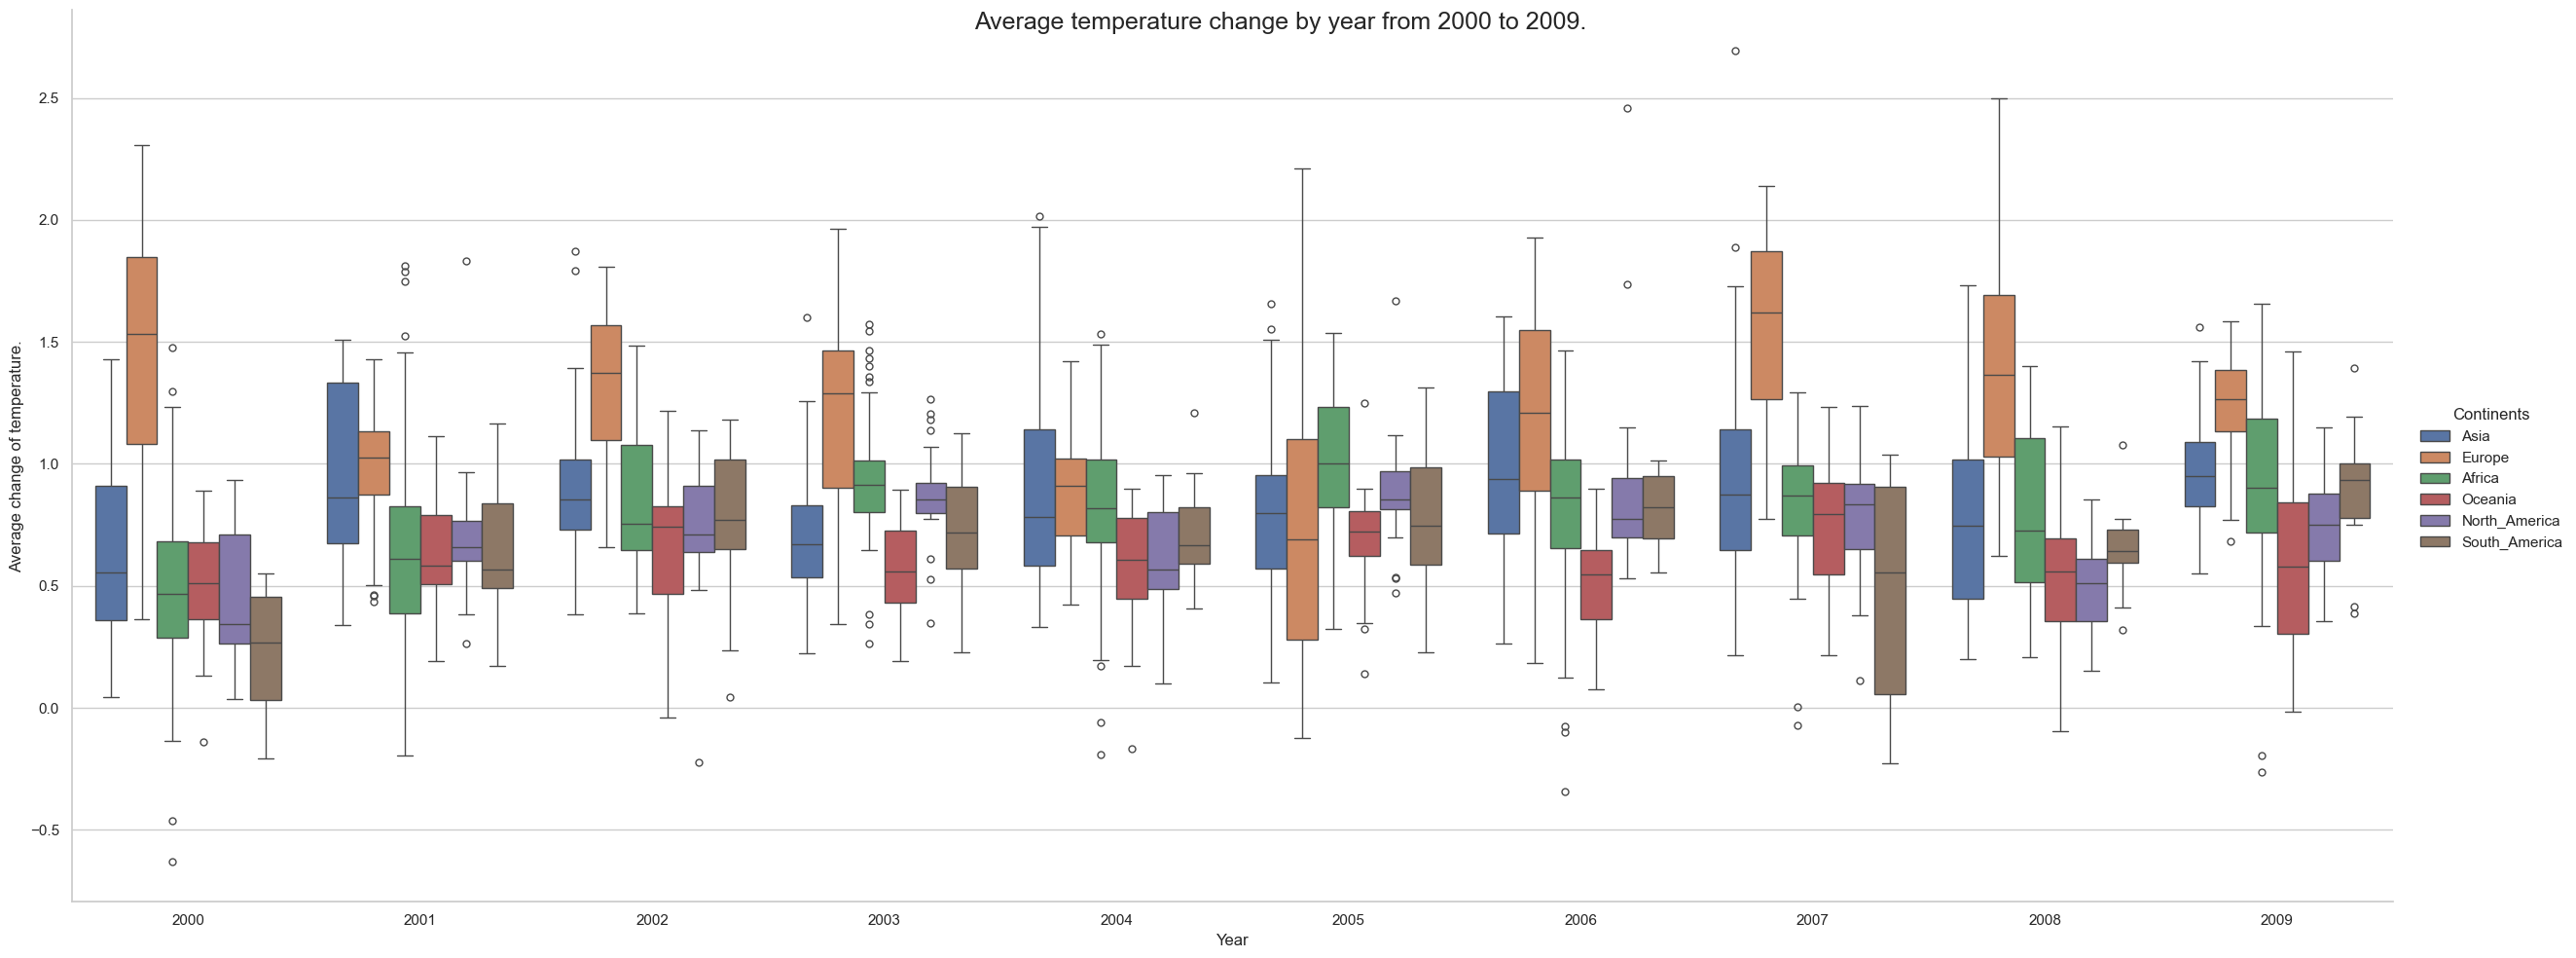

In [28]:
plotEmissionBoxPlot(df_2000_2009, '2000 to 2009.')

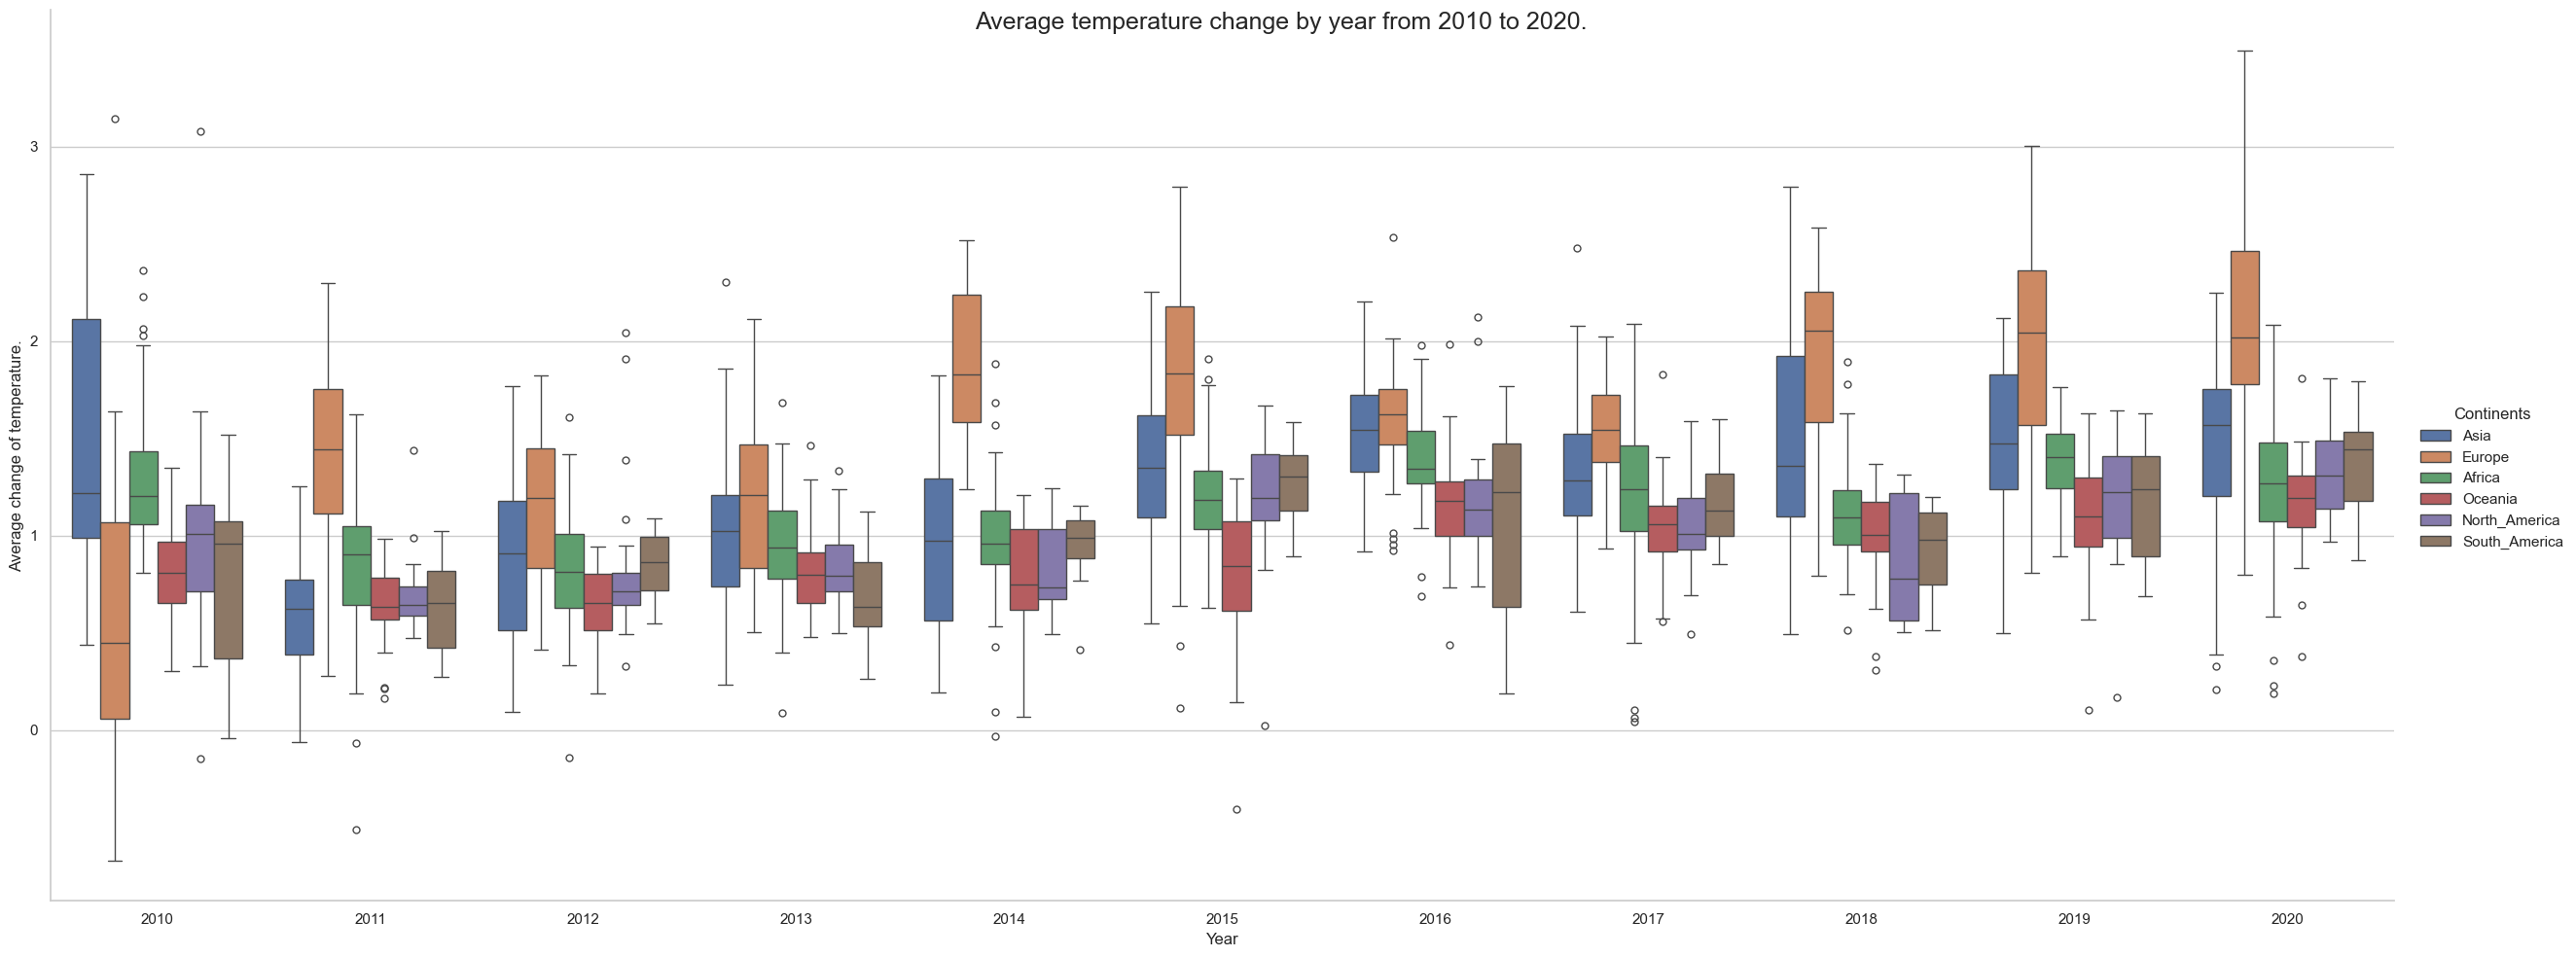

In [29]:
plotEmissionBoxPlot(df_2010_2020, '2010 to 2020.')

We add where the country is located by continent.

Also adding an extra column to the dataset for the total population, calculated from the total male and female population for each year

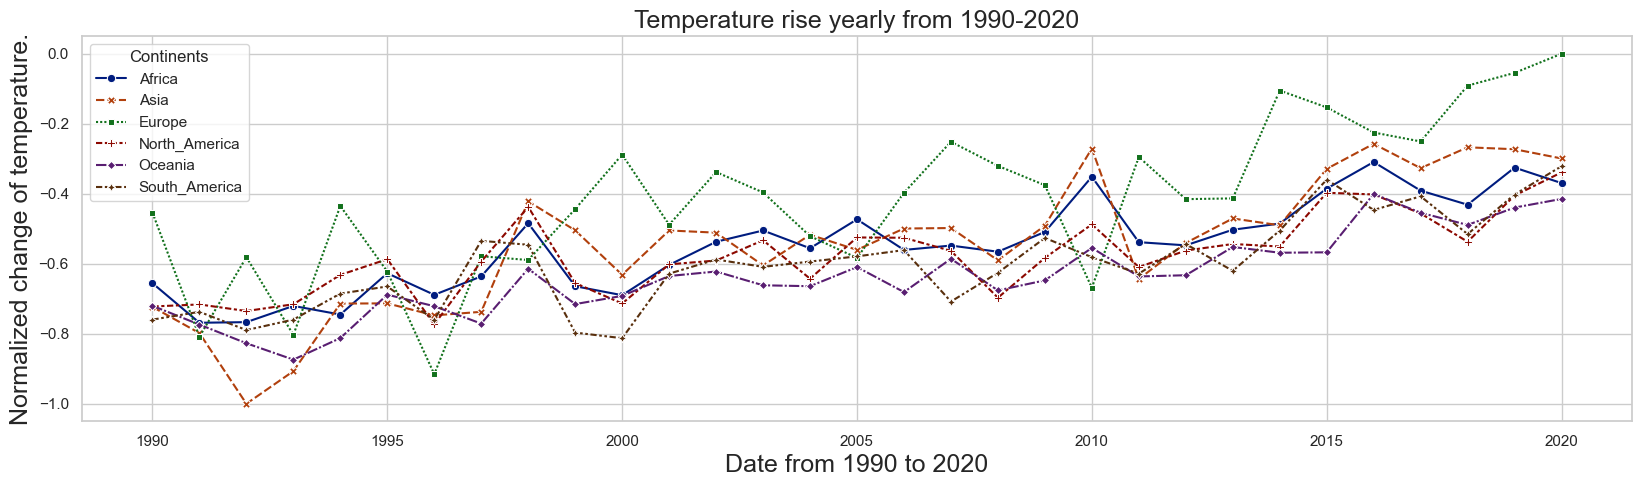

In [30]:
data_mean_tmp_emi = df.groupby(['Year','Continents'])[['total_emission','Average Temperature °C']].agg('mean').reset_index()
data_sum_pop = df.groupby(['Year','Continents'])[('total_population')].agg('sum').reset_index()
data_joined = pd.merge(data_mean_tmp_emi, data_sum_pop,  how='left', left_on=['Year','Continents'], right_on = ['Year','Continents'])
data_joined2 = normalize(data_joined[['total_emission','Average Temperature °C','total_population']])
data_joined2 = pd.concat((data_joined[['Year','Continents']], data_joined2[['total_emission','Average Temperature °C','total_population']]), axis = 1)

sns.lineplot(data = data_joined2, x = 'Year', y = 'Average Temperature °C', hue = 'Continents', palette = 'dark', style = 'Continents', markers = True)
plt.title('Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of temperature.', fontsize = 18)
plt.show()

Analyze different variables against the Average temperature and Continents

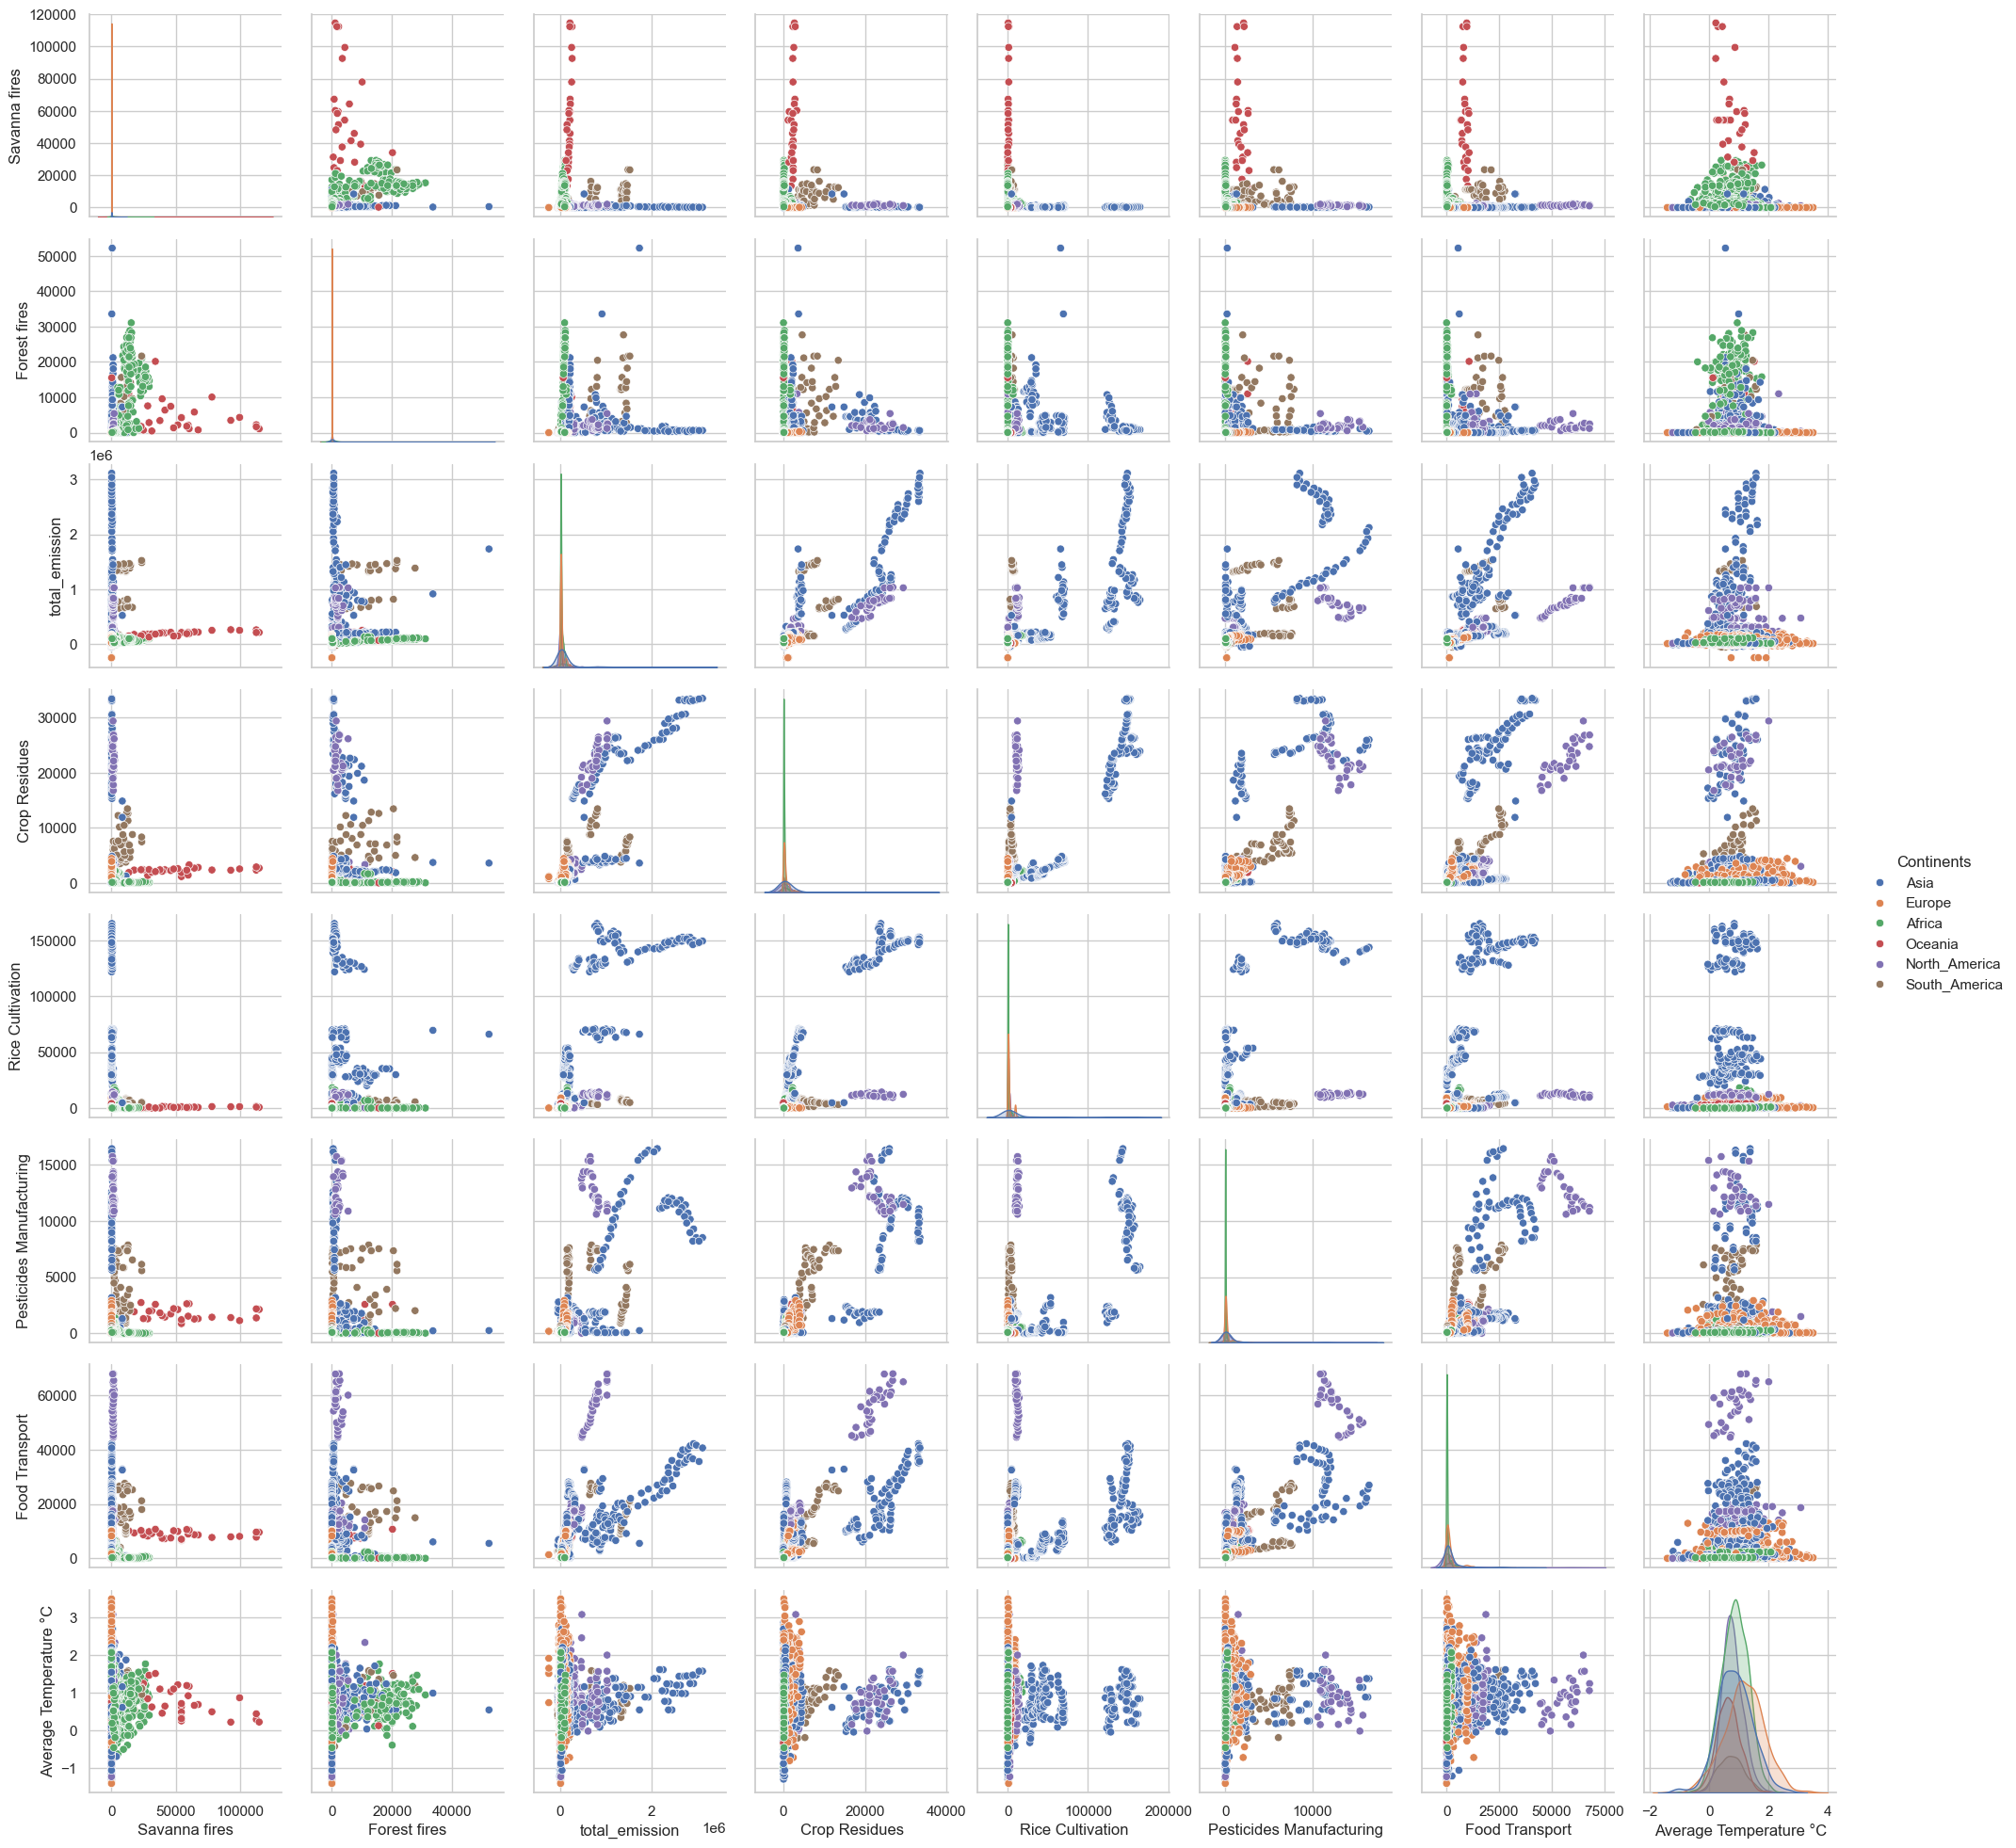

In [31]:
sns.pairplot(df, vars =[
     'Savanna fires', 'Forest fires', 
     "total_emission", 'Crop Residues',
     'Rice Cultivation','Pesticides Manufacturing',
     'Food Transport',"Average Temperature °C"
],
y_vars="Average Temperature °C",
hue = "Continents")
plt.show()

## Hypothesis Testing


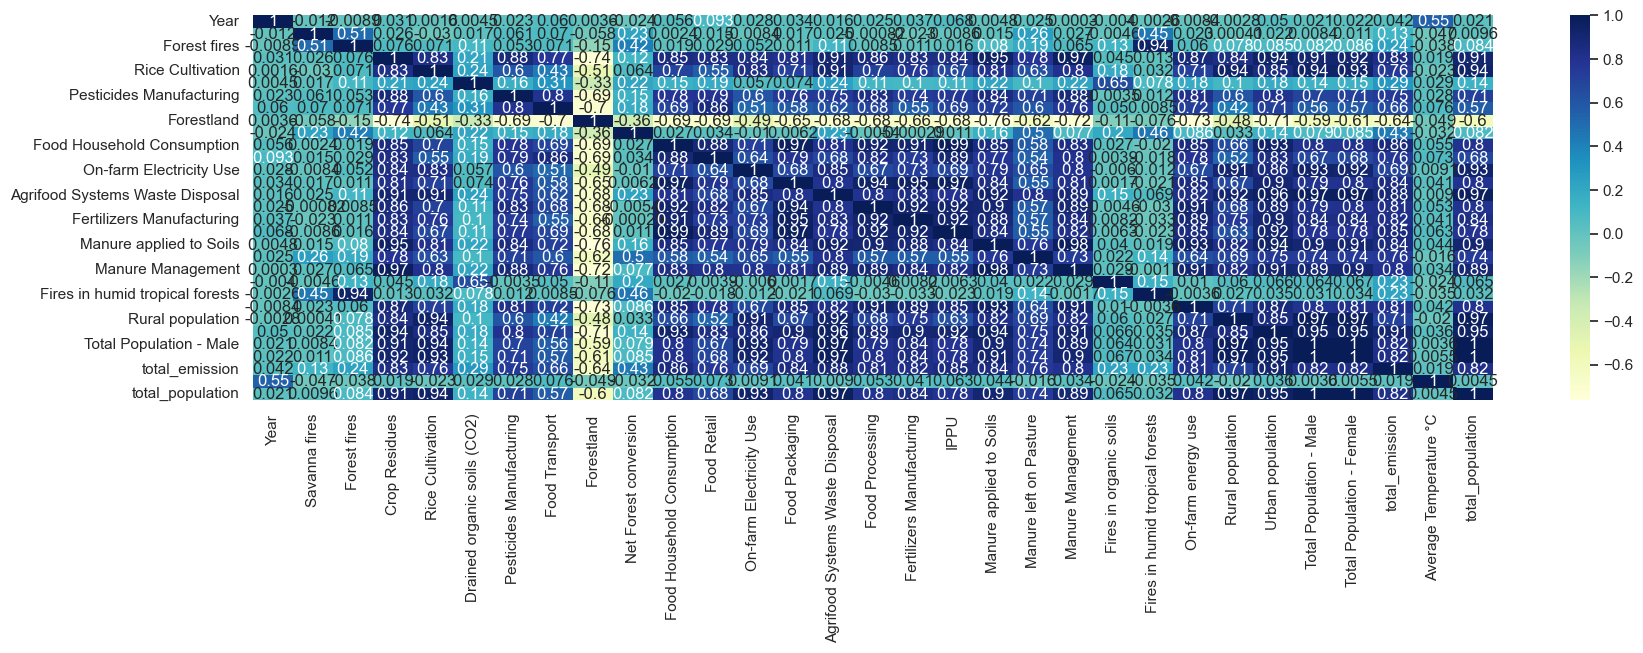

In [32]:
dataplot = df.drop(['Area', 'Continents'], axis = 1)
sns.heatmap(dataplot.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [33]:

df_emiPerCapita = df[['Area', 'Year', 'Forestland', 'total_emission', 'total_population','Continents']]
df_emiPerCapita['Emission_Per_Capita'] = df_emiPerCapita['total_emission'] / df_emiPerCapita['total_population']
df = pd.concat([df, df_emiPerCapita['Emission_Per_Capita']], axis = 1)
df_emiPerCapita_mean = df_emiPerCapita.groupby('Area')['Emission_Per_Capita'].mean()
df_emiPerCapita_mean.sort_values(ascending = False).head(n=10).reset_index()

correlation = df.groupby('Year').agg({'total_emission':'sum','Average Temperature °C':'mean','total_population':'sum', 'Forestland':'sum', 'Emission_Per_Capita':'mean'})
correlation.corr()

total_emission  Average Temperature °C  \
total_emission                1.000000                0.905520   
Average Temperature °C        0.905520                1.000000   
total_population              0.981828                0.912050   
Forestland                    0.086944                0.168713   
Emission_Per_Capita           0.606342                0.516327   

                        total_population  Forestland  Emission_Per_Capita  
total_emission                  0.981828    0.086944             0.606342  
Average Temperature °C          0.912050    0.168713             0.516327  
total_population                1.000000    0.014764             0.543137  
Forestland                      0.014764    1.000000            -0.025194  
Emission_Per_Capita             0.543137   -0.025194             1.000000

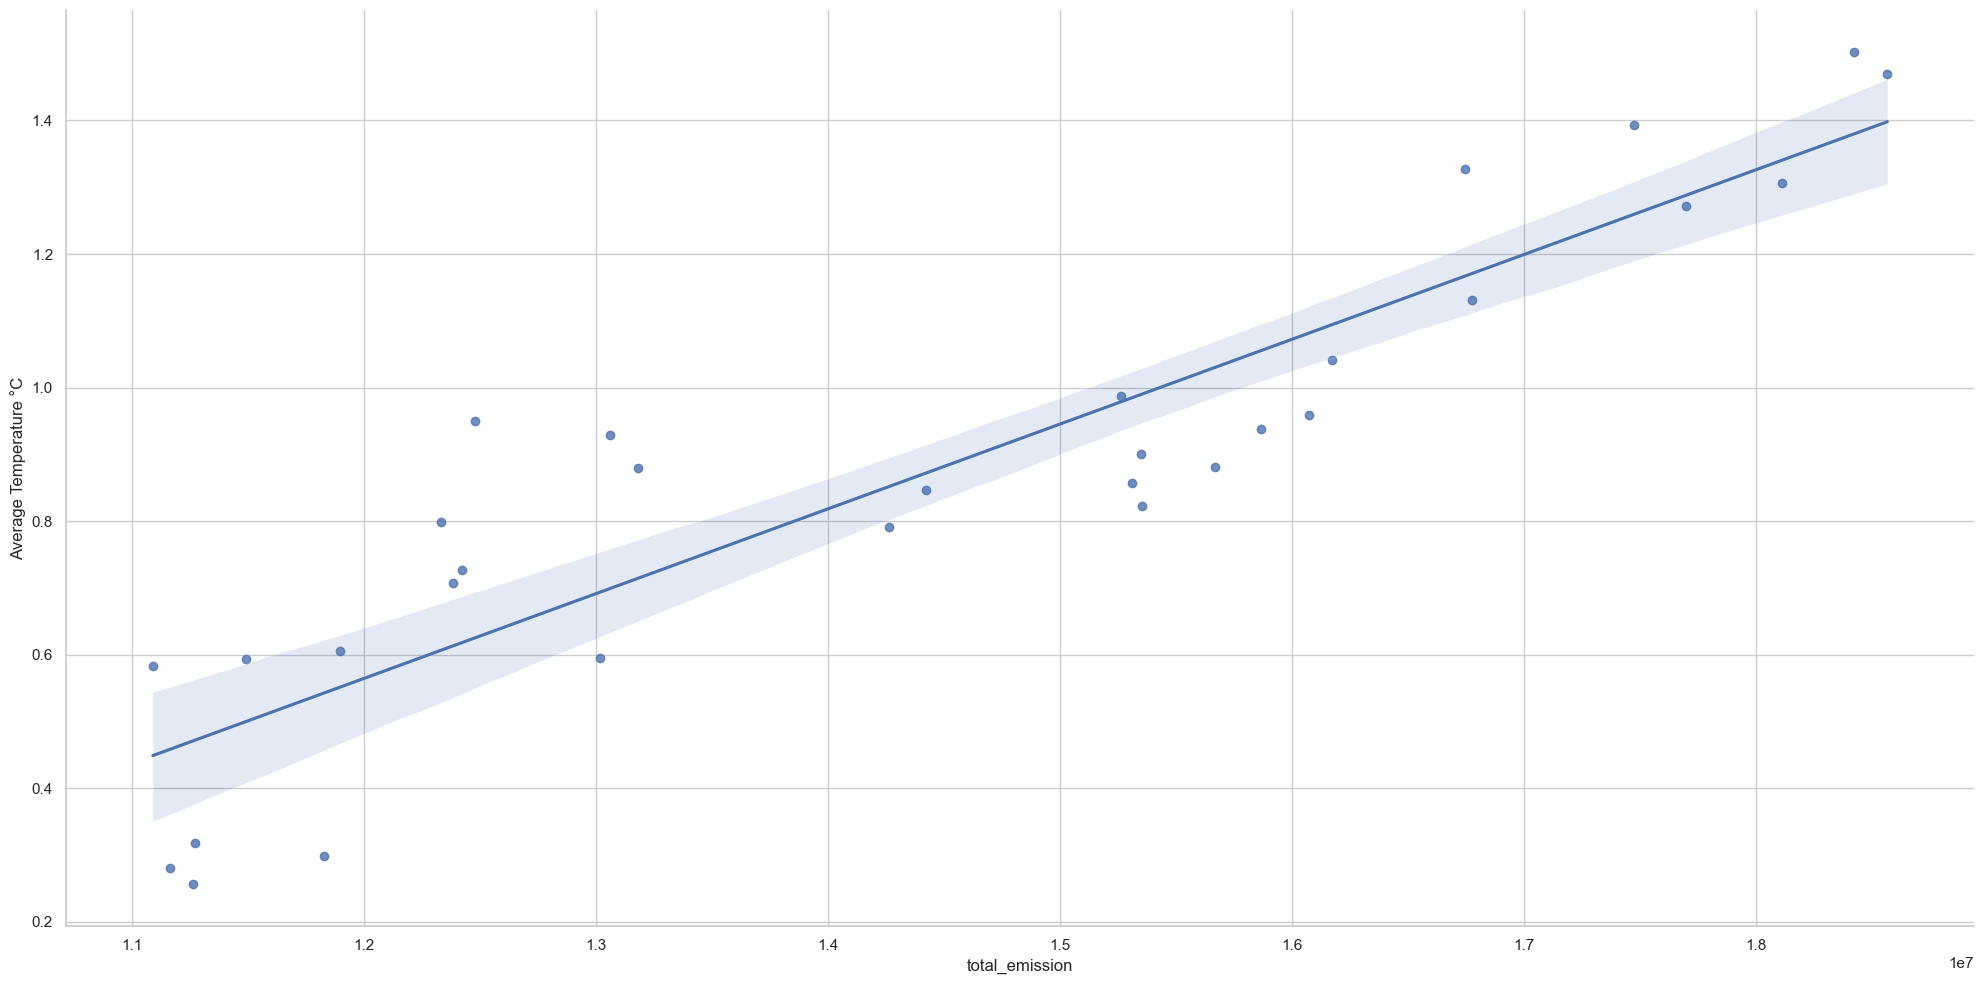

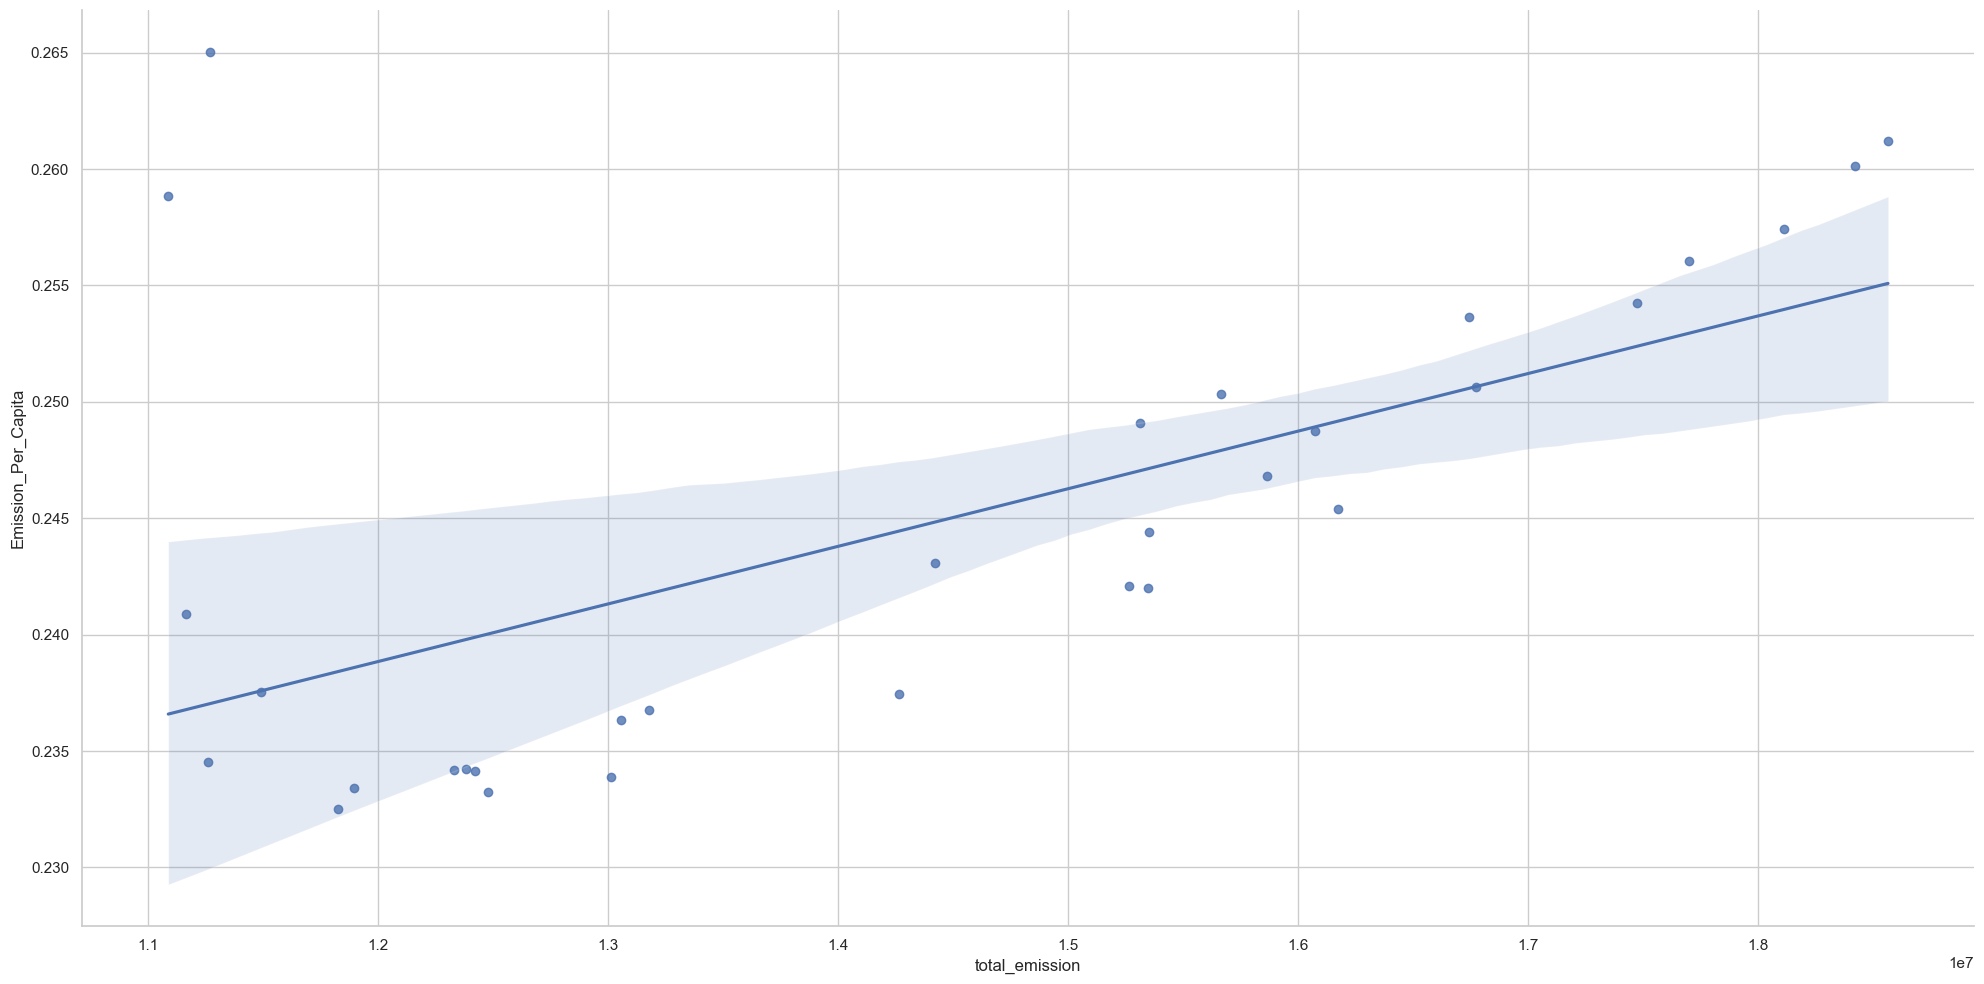

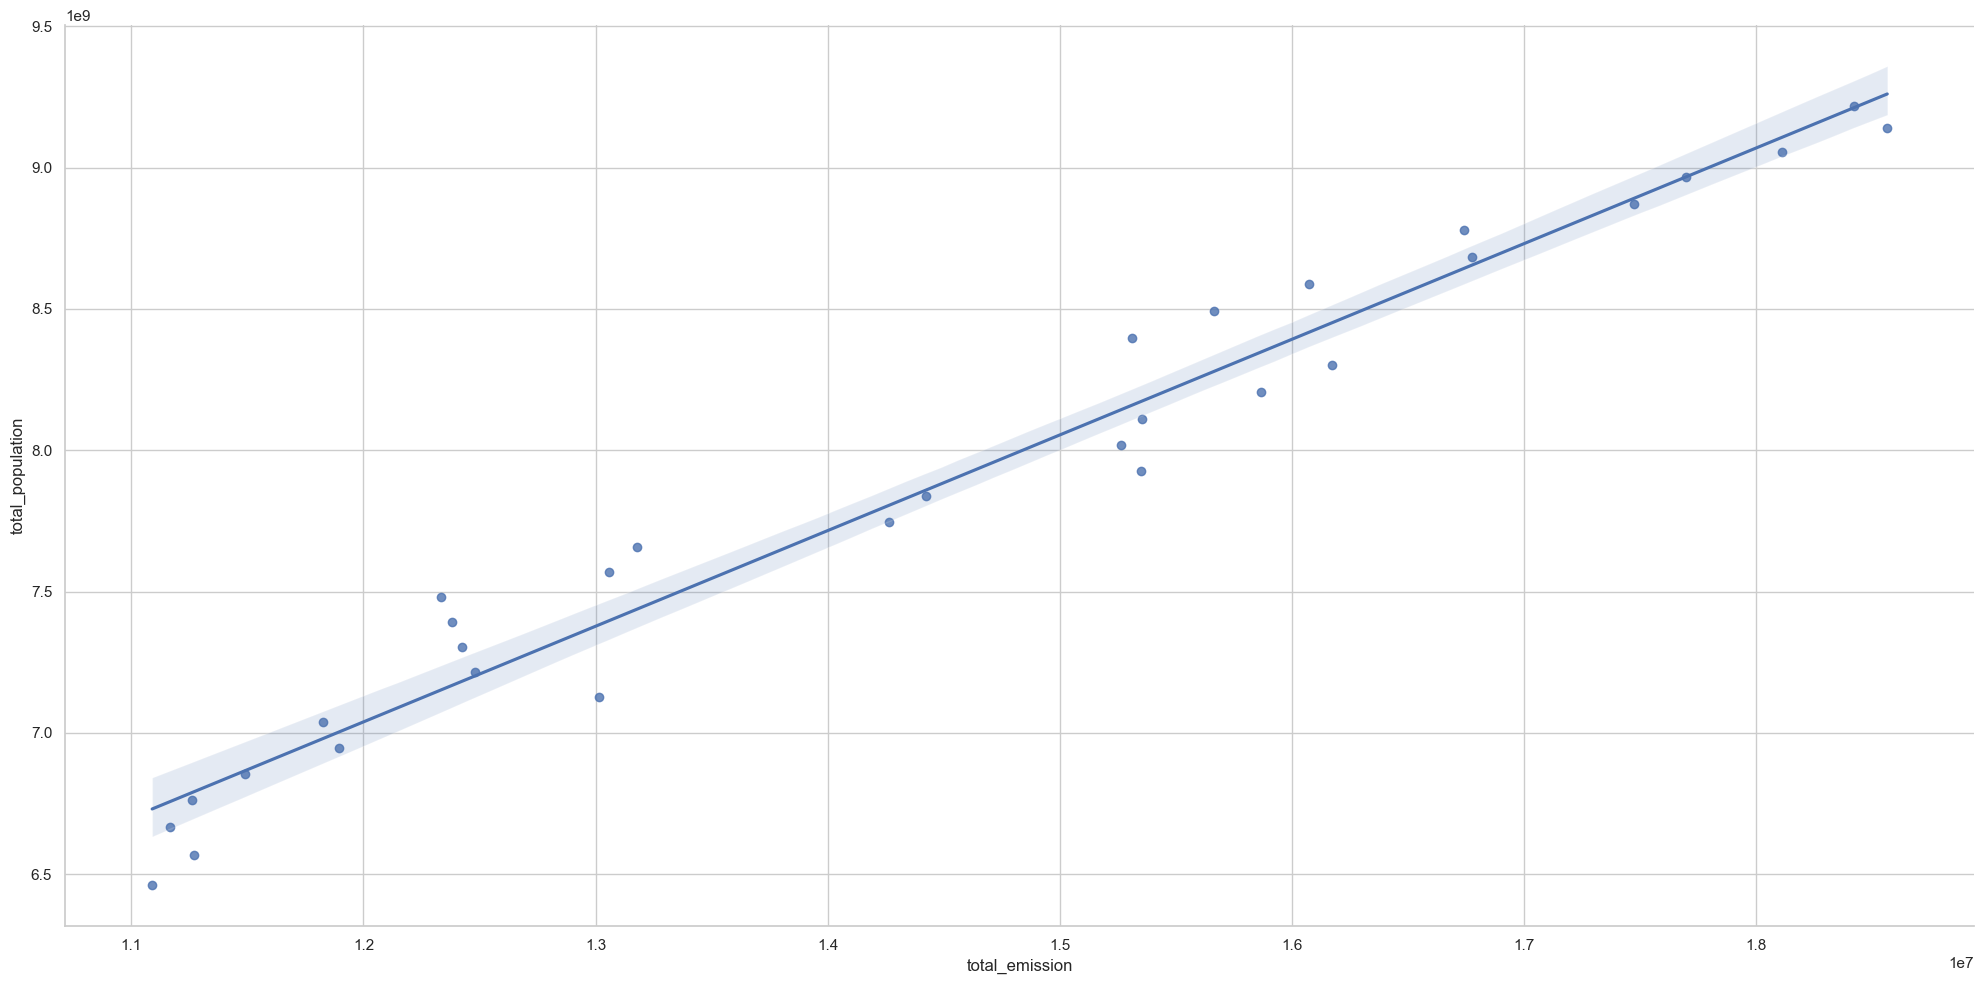

In [34]:
correlation['Year'] = correlation.index
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Average Temperature °C',
            height = 10,
            aspect = 2,
            fit_reg = True)
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Emission_Per_Capita',
            height = 10,
            aspect = 2,
            fit_reg = True)
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'total_population',
            height = 10,
            aspect = 2,
            fit_reg = True)
plt.show()


## Perform train-test splits

## Perform train-test splits - Model 1

In [35]:
#Function to calculate slope intercept
def get_slope_intercept(model):
  slope = model.coef_[0]
  intercept = model.intercept_

  #Return scope and intercept values
  return slope, intercept

In [36]:
def calculate_evaluation_metrics(predictions, y_values):
  metrics = {
      'R-squared': r2_score(y_values, predictions),
      'MAE': mean_absolute_error(y_values, predictions),
      'MSE': mean_squared_error(y_values, predictions),
      'RMSE': mean_squared_error(y_values, predictions, squared=False)
  }
  return metrics

In [37]:
#Define values to be used to train the model
X = df[['Food Processing']]
y = df['Average Temperature °C']

# Calculate and get train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plotting the training and testing sets

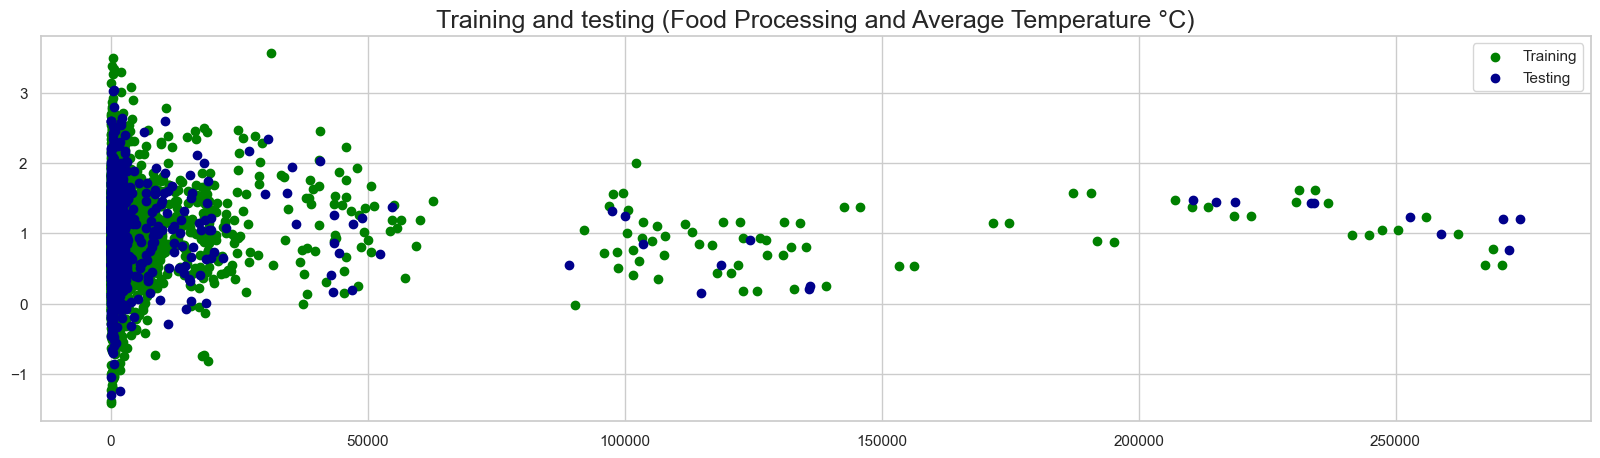

In [38]:
# Plot the results using scatter plot 
plt.title('Training and testing (Food Processing and Average Temperature °C)', fontsize = 18)
plt.scatter(X_train, y_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_test, y_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

### Training a linear model

In [39]:
# Create an instance of the LinearRegression class
lm = LinearRegression()

# Train the linear regression model
lm.fit(X_train, y_train)

# Get slope and intercept values
a, b = get_slope_intercept(lm)

print("Slope:\t\t", a)
print("Intercept:\t", float(b))

Slope:		 1.4953756986859415e-06
Intercept:	 0.8710840647721885


### Assessing model on the training data

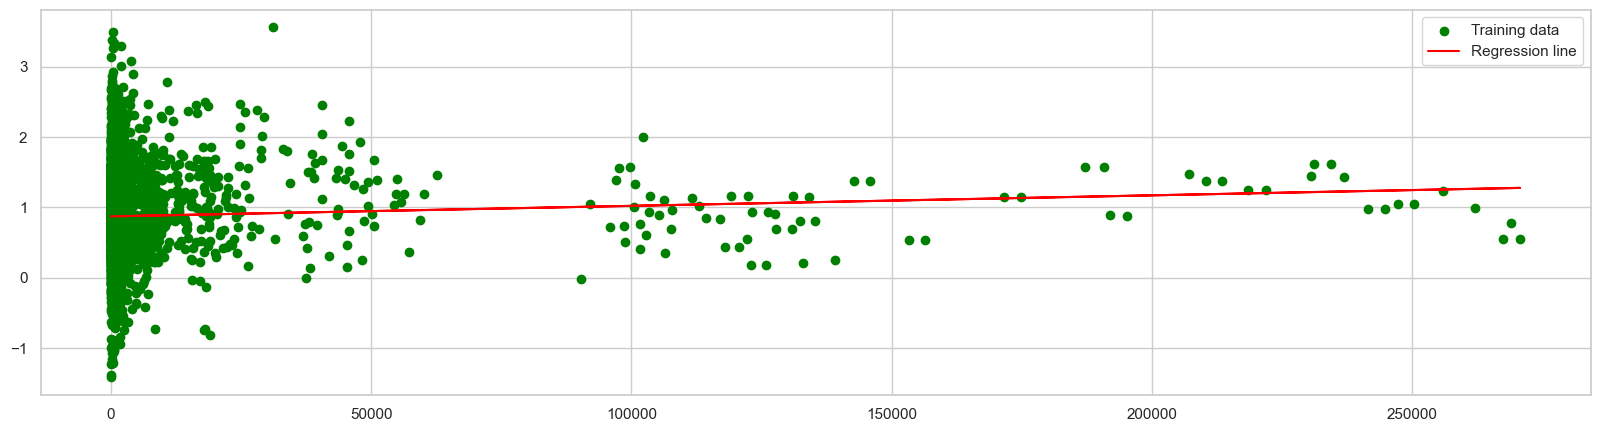

In [40]:
# Generate predictions on the training set
y_train_pred = lm.predict(X_train)

# Plot the results
plt.scatter(X_train, y_train, color='green', label='Training data')  # Plot the training data in green
plt.plot(X_train, y_train_pred, color='red', label='Regression line')  # Plot the line connecting the generated y-values
plt.legend()
plt.show()


In [41]:
# Print the training MSE and R-squared score

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_r2 = metrics.r2_score(y_train, y_train_pred)
train_rmse = metrics.mean_squared_error(y_train, y_train_pred, squared=False) 
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)

print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)

Training MSE: 0.30875085715861944
Training R-squared: 0.0025953243834713202
Training RMSE: 0.5556535405795768
Training MAE: 0.42754784005940566


## Perform train-test splits - Model 2

In [42]:
# Define values to be used to train the model
X = df[['Food Transport']]
y = df['Average Temperature °C']

# Calculate and get train test split
X_one_train, X_one_test, y_one_train, y_one_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plotting the training and testing sets

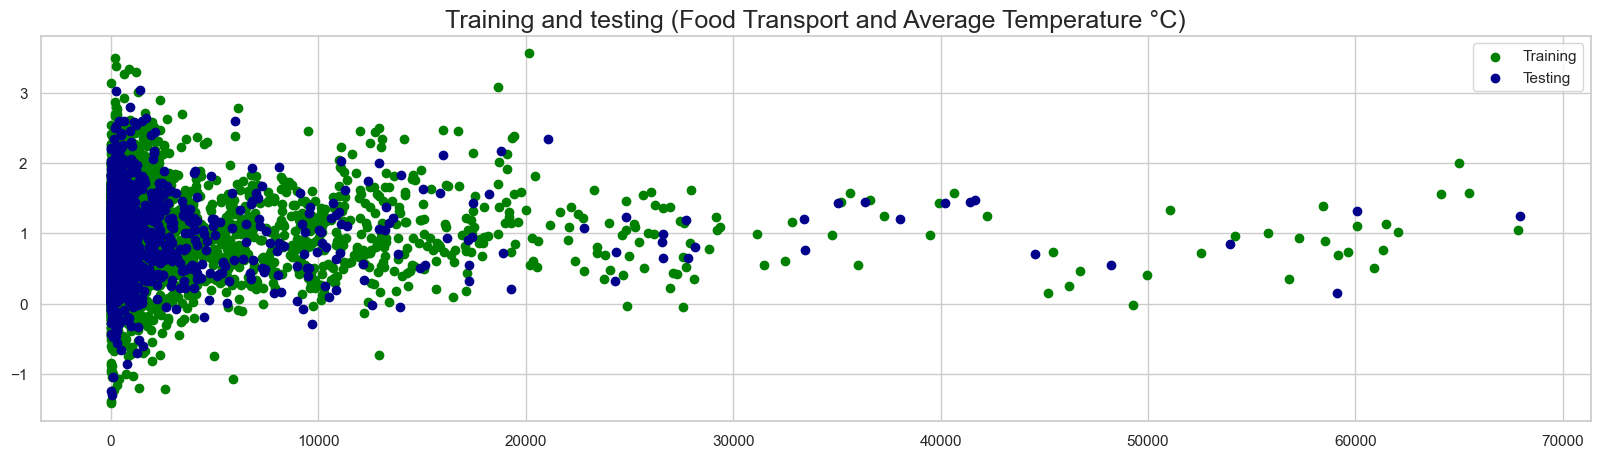

In [43]:
# Plot the results using scatter plot 
plt.title('Training and testing (Food Transport and Average Temperature °C)', fontsize = 18)
plt.scatter(X_one_train, y_one_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_one_test, y_one_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

### Training a linear model

In [44]:
# Create an instance of the LinearRegression class
lm = LinearRegression()

# Train the linear regression model
lm.fit(X_one_train, y_one_train)

# Get slope and intercept values
a, b = get_slope_intercept(lm)

print("Slope:\t\t", a)
print("Intercept:\t", float(b))

Slope:		 7.59358371304125e-06
Intercept:	 0.8619608241661182


### Assessing model on the training data

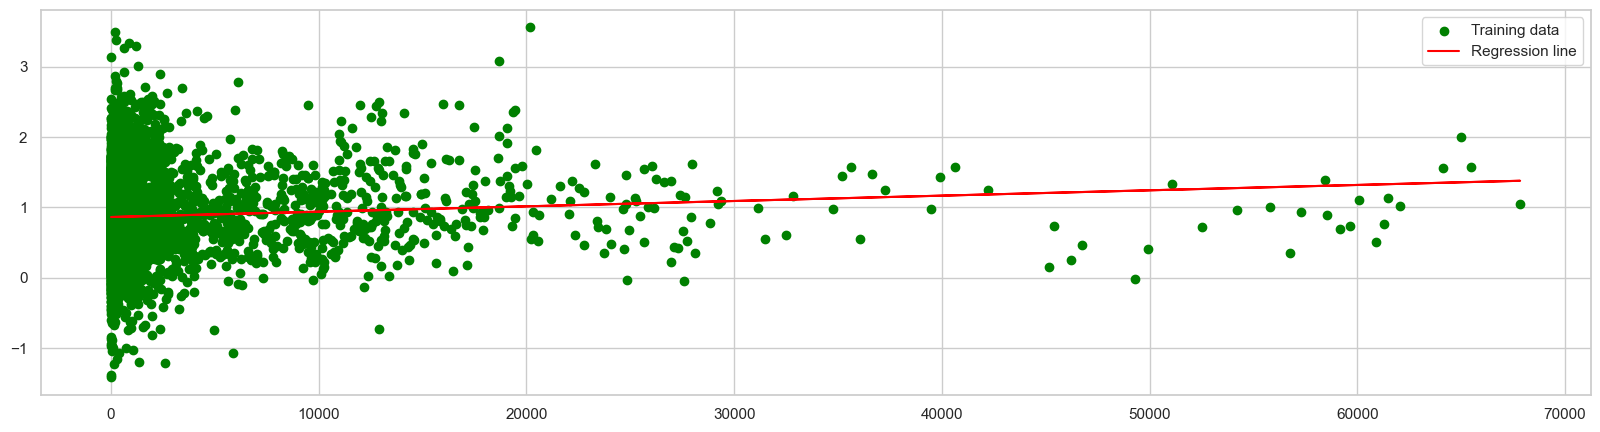

In [45]:
y_one_train_pred = lm.predict(X_one_train)

# Plot the results
plt.scatter(X_one_train, y_one_train, color='green', label='Training data')  # Plot the training data in green
plt.plot(X_one_train, y_one_train_pred, color='red', label='Regression line')  # Plot the line connecting the generated y-values
plt.legend()
plt.show()

In [46]:
train_mse = metrics.mean_squared_error(y_one_train, y_one_train_pred)
train_r2 = metrics.r2_score(y_one_train, y_one_train_pred)
train_rmse = metrics.mean_squared_error(y_one_train, y_one_train_pred, squared=False) 
train_mae = metrics.mean_absolute_error(y_one_train, y_one_train_pred)

print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)

Training MSE: 0.3077524288514142
Training R-squared: 0.005820698625469967
Training RMSE: 0.5547543860587442
Training MAE: 0.42708337424729914


## Perform train-test splits - Model 3

In [47]:
# Define values to be used to train the model
X = df[['total_emission']]
y = df['Agrifood Systems Waste Disposal']

# Calculate and get train test split
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plotting the training and testing sets

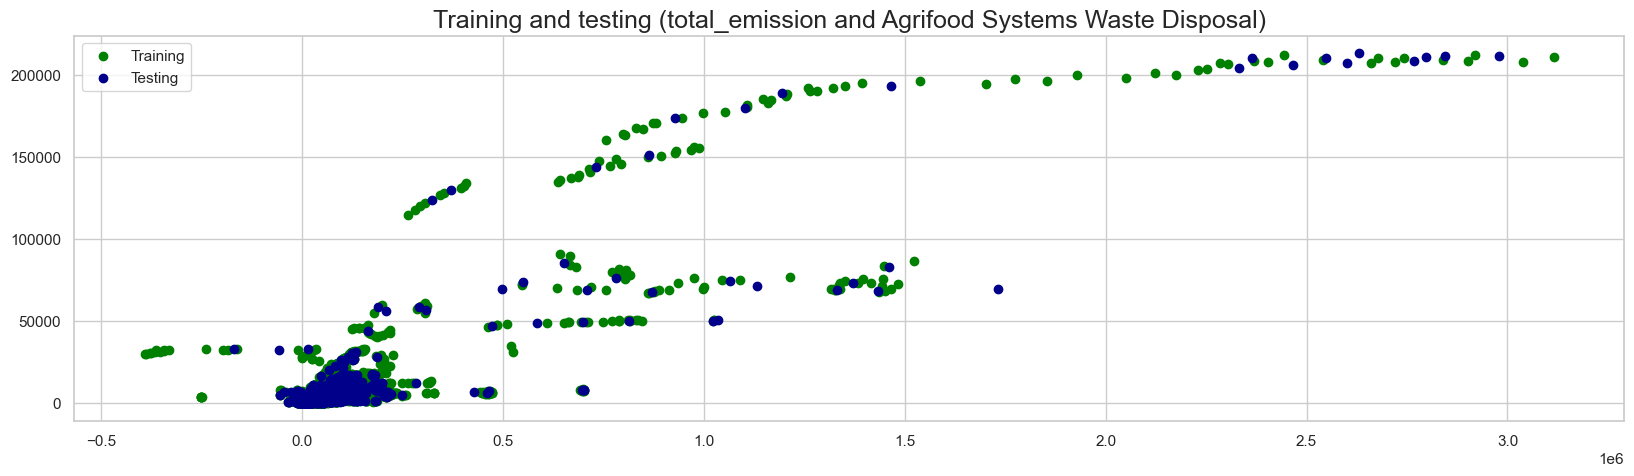

In [48]:
#Plot the results using scatter plot 
plt.title('Training and testing (total_emission and Agrifood Systems Waste Disposal)', fontsize = 18)
plt.scatter(X_two_train, y_two_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_two_test, y_two_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

### Training a linear model

In [49]:
# Create an instance of the LinearRegression class
lm = LinearRegression()

# Train the linear regression model
lm.fit(X_two_train, y_two_train)

# Get slope and intercept values
a, b = get_slope_intercept(lm)

print("Slope:\t\t", a)
print("Intercept:\t", float(b))

Slope:		 0.08740633248098702
Intercept:	 536.4103891809482


### Assessing model on the training data

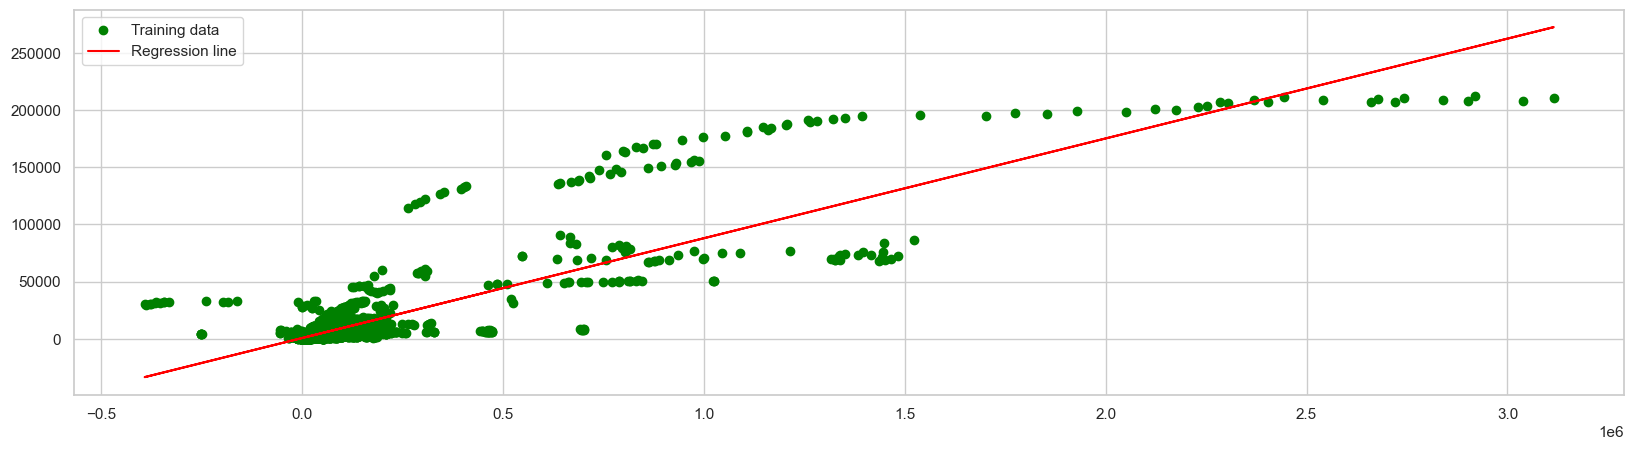

In [50]:
y_two_train_pred = lm.predict(X_two_train)

# Plot the results
plt.scatter(X_two_train, y_two_train, color='green', label='Training data')  # Plot the training data in green
plt.plot(X_two_train, y_two_train_pred, color='red', label='Regression line')  # Plot the line connecting the generated y-values
plt.legend()
plt.show()

In [51]:
train_mse = metrics.mean_squared_error(y_two_train, y_two_train_pred)
train_r2 = metrics.r2_score(y_two_train, y_two_train_pred)
train_rmse = metrics.mean_squared_error(y_two_train, y_two_train_pred, squared=False) 
train_mae = metrics.mean_absolute_error(y_two_train, y_two_train_pred)

print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)

Training MSE: 116283227.51479344
Training R-squared: 0.7586494372361622
Training RMSE: 10783.470105434217
Training MAE: 3720.876060948194


## Perform train-test splits - Model 4

In [52]:
# Define values to be used to train the model
X = df[['On-farm Electricity Use']]
y = df['Pesticides Manufacturing']

# Calculate and get train test split
X_three_train, X_three_test, y_three_train, y_three_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Plotting the training and testing sets

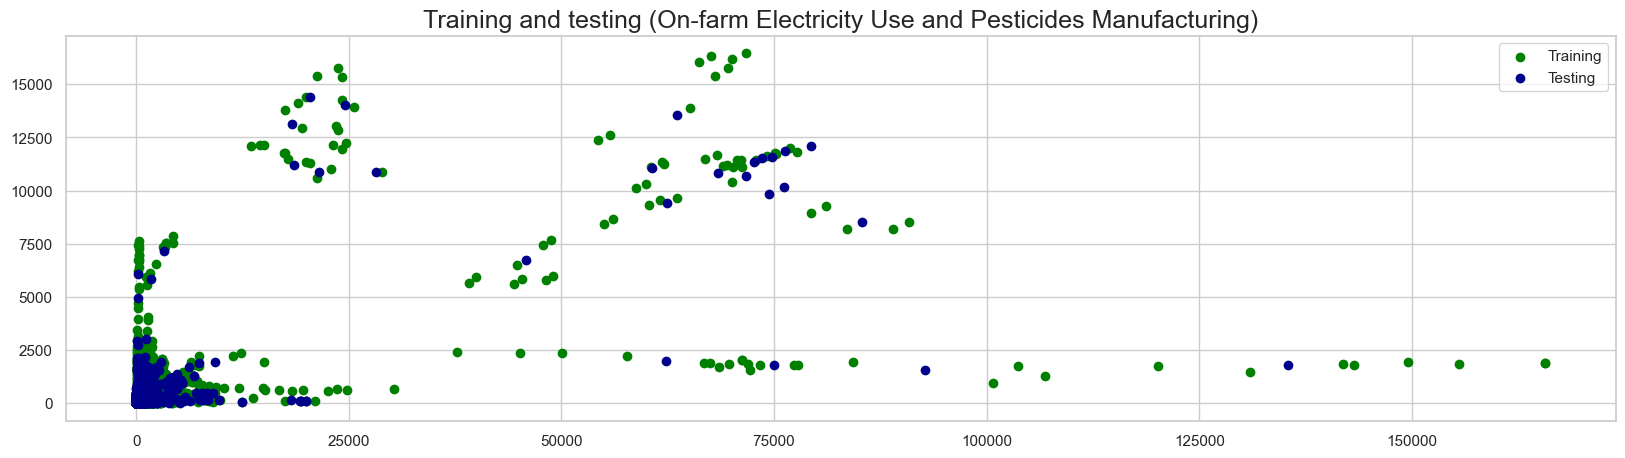

In [53]:
# Plot the results using scatter plot 
plt.title('Training and testing (On-farm Electricity Use and Pesticides Manufacturing)', fontsize = 18)
plt.scatter(X_three_train, y_three_train, color='green', label='Training')  # plot the training data in green
plt.scatter(X_three_test, y_three_test, color='darkblue', label='Testing')  # plot the testing data in blue
plt.legend()
plt.show()

### Training a linear model

In [54]:
# Create an instance of the LinearRegression class
lm = LinearRegression()

# Train the linear regression model
lm.fit(X_three_train, y_three_train)

# Get slope and intercept values
a, b = get_slope_intercept(lm)

print("Slope:\t\t", a)
print("Intercept:\t", float(b))

Slope:		 0.08727863559840762
Intercept:	 194.59307530694102


### Assessing model on the training data

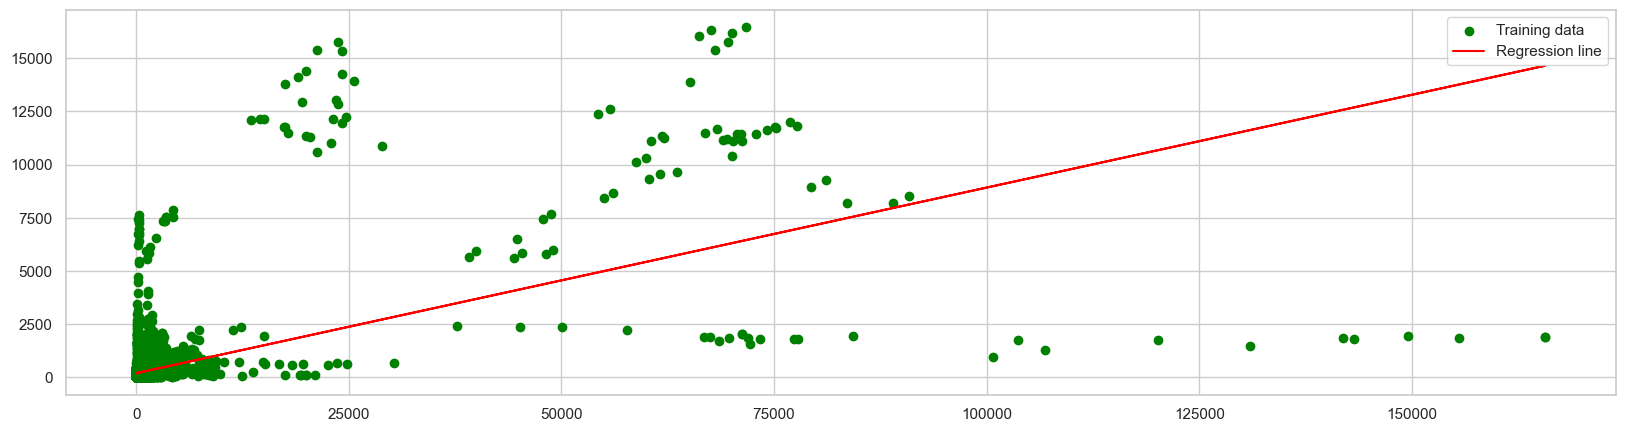

In [55]:
y_three_train_pred = lm.predict(X_three_train)

# Plot the results
plt.scatter(X_three_train, y_three_train, color='green', label='Training data')  # Plot the training data in green
plt.plot(X_three_train, y_three_train_pred, color='red', label='Regression line')  # Plot the line connecting the generated y-values
plt.legend()
plt.show()

In [56]:
train_mse = metrics.mean_squared_error(y_three_train, y_three_train_pred)
train_r2 = metrics.r2_score(y_three_train, y_three_train_pred)
train_rmse = metrics.mean_squared_error(y_three_train, y_three_train_pred, squared=False) 
train_mae = metrics.mean_absolute_error(y_three_train, y_three_train_pred)

print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)
print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)

Training MSE: 1375122.831050645
Training R-squared: 0.3310158074138334
Training RMSE: 1172.656314122192
Training MAE: 383.88828378481367


## Conclusion

The dataset provides a valuable resource for understanding the complex relationship between agriculture, climate change, and CO2 emissions. By leveraging advanced data analysis techniques, such as machine learning, we can unlock further insights to inform evidence-based decision-making and develop sustainable agricultural practices. This knowledge is critical for mitigating climate change and ensuring a sustainable future for our planet.